<ol>
  <li>
    <p>
      <strong>MetaVeri</strong>
    </p>
  </li>
  <li>
    <p>
      <strong>Veri Seti ve Analiz Süreci</strong>
    </p>
  </li>
  <li>
    <p>
      <strong>Loading DataSet</strong>
    </p>
  </li>
  <li>
    <p>
      <strong>Data Cleaning and Preparations</strong>
      <br>4.0.1. Splitting Dataset <br>4.0.2. Skewness of Continuous Variables <br>4.0.3. Building Preprocess Pipeline <br>4.0.4. Preprocessed Train Set
    </p>
  </li>
  <li>
    <p>
      <strong>EDA - Exploratory Data Analysis</strong>
      <br>5.0.1. Target Variable Distribution <br>5.0.2. Continuous Variables Summary Table <br>5.0.3. Distribution of Continuous Features <br>5.0.4. Categorical Variables Summary Table <br>5.0.5. Distribution of Categorical Features <br>5.0.6. Correlation Heatmap <br>5.0.7. Person Income vs Key Factors by Loan Status <br>5.0.8. ViolinPlots <br>5.0.9. Education Level vs Credit Score
    </p>
  </li>
  <li>
    <p>
      <strong>Models and Hyperparameter Tuning</strong>
    </p>
  </li>
  <li>
    <p>
      <strong>Model Comparison and Final Reviews</strong>
      <br>7.0.1. Best 3 Models by Accuracy Score <br>7.0.2. Best 3 Models by AUC Score
    </p>
  </li>
  <li>
    <p>
      <strong>Best Model - LightGBM</strong>
      <br>8.0.1. Best Model Classification Report <br>8.0.2. Best Model Confusion Matrix
    </p>
  </li>
</ol>

<h1>MetaVeri</h1>
<table>
    <caption><a href="https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data">Source: Kaggle-loan-approval-classification-data </a></caption>
  <thead>
    <tr>
      <th>Sütun</th>
      <th>Açıklama</th>
      <th>Tür</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>
        <code>person_age</code>
      </td>
      <td>Kişinin yaşı</td>
      <td>Integer</td>
    </tr>
    <tr>
      <td>
        <code>person_gender</code>
      </td>
      <td>Kişinin cinsiyeti</td>
      <td>Kategorik</td>
    </tr>
    <tr>
      <td>
        <code>person_education</code>
      </td>
      <td>Kişinin eğitim seviyesi</td>
      <td>Kategorik</td>
    </tr>
    <tr>
      <td>
        <code>person_income</code>
      </td>
      <td>Yıllık gelir</td>
      <td>Float</td>
    </tr>
    <tr>
      <td>
        <code>person_emp_exp</code>
      </td>
      <td> Deneyim yılı</td>
      <td>Integer</td>
    </tr>
    <tr>
      <td>
        <code>person_home_ownership</code>
      </td>
      <td>Ev sahipliği durumu (örneğin, kirada, sahip, ipotek)</td>
      <td>Kategorik</td>
    </tr>
    <tr>
      <td>
        <code>loan_amnt</code>
      </td>
      <td>Talep edilen kredi miktarı</td>
      <td>Float</td>
    </tr>
    <tr>
      <td>
        <code>loan_intent</code>
      </td>
      <td>Kredinin amacı</td>
      <td>Kategorik</td>
    </tr>
    <tr>
      <td>
        <code>loan_int_rate</code>
      </td>
      <td>Kredi faiz oranı</td>
      <td>Float</td>
    </tr>
    <tr>
      <td>
        <code>loan_percent_income</code>
      </td>
      <td>Kredi miktarının yıllık gelire oranı</td>
      <td>Float</td>
    </tr>
    <tr>
      <td>
        <code>cb_person_cred_hist_length</code>
      </td>
      <td>Kredi geçmişinin uzunluğu (yıl olarak)</td>
      <td>Flaot</td>
    </tr>
    <tr>
      <td>
        <code>credit_score</code>
      </td>
      <td>Kişinin kredi puanı</td>
      <td>Integer</td>
    </tr>
    <tr>
      <td>
        <code>previous_loan_defaults_on_file</code>
      </td>
      <td>Önceki kredi temerrüt durumu</td>
      <td>Kategorik</td>
    </tr>
    <tr>
      <td>
        <code>loan_status(target variable)</code>
      </td>
      <td>Kredi onay durumu: 1 = onaylandı; 0 = reddedildi</td>
      <td>Integer</td>
    </tr>
  </tbody>
</table>




<h1>Veri Seti ve Analiz Süreci</h1>
<p>Veri seti 44993 gözlemden ve 14 değişkenden oluşmaktadır. loan status değişkeni hedef değişkendir. loan_percent_income değişkeni loan amnt değişkeninin <br>
   person_income değişkenine oranıdır. dolayısıyla ilgili değişken ayrı bir bilgi taşımamakta olup analiz sürecinden çıkarılacaktır. hedef değişken 2 sınıftan oluşmaktadır. sınıfların dağılımı dengesizdir.<strong>( %77.00 "rejected-0" %22.00 "approved-1")</strong>. veri setinde eksik gözlem bulunmamaktadır.<br>
   
   Başvuranın ve kredinin çeşitli özelliklerine göre kredi onayının verilip verilmemesine karar verilecektir. 6 adet model üzerinde çalışılacak olup accuracy ve auc skorları model performanslarının değerlendirilmesi sürecinde kullanılacaktır. target değişkenindeki dengesizlik nedeniyle modelin negatif sınıfları daha iyi tahmin edeceği beklenmektedir. Eğitilecek model ile kredi başvurularının onaylanacak olduğu bir senaryoda false pozitif tahminlerin olabildiğince düşük olmasının  daha önemli olduğu varsayılacaktır. bu nedenle  accuracy ve auc' a ek olarak pozitif sınıf için precision, recall  ve f1-score metrikleri de model tuning aşamasında takip edilecektir. veri ön işleme süreci için pipeline oluşturulacaktır. Modellerin tune edilmesi sürecinde 5 katlı cross validation kullanılacaktır. ve gridsearch ile optimal parametre kombinasyonları bulunacaktır.

  <ol>
    <li>Logistic Regression</li>
    <li>K-Nearest Neighbors(KNN)</li>
    <li>Support Vector Machine</li>
    <li>Random Forest</li>
    <li>LightGBM</li>
    <li>Multi-Layer Neural Network</li>
  
  </ol>
</p>


<h1>Loading DataSet</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
store = pd.HDFStore(os.getenv("store_data"))

In [2]:
data = store["loan_data"];data.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0          22        female           Master        71948.0               0   
1          21        female      High School        12282.0               0   
2          25        female      High School        12438.0               3   
3          23        female         Bachelor        79753.0               0   
4          24          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    Personal          16.02   
1                   OWN     1000.0   Education          11.14   
2              MORTGAGE     5500.0     Medical          12.87   
3                  RENT    35000.0     Medical          15.23   
4                  RENT    35000.0     Medical          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                           3           561   
1                 0.08                           2           504   
2                 0.44                           3           635   
3                 0.44                           2           675   
4                 0.53                           4           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44993 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44993 non-null  int32  
 1   person_gender                   44993 non-null  object 
 2   person_education                44993 non-null  object 
 3   person_income                   44993 non-null  float64
 4   person_emp_exp                  44993 non-null  int64  
 5   person_home_ownership           44993 non-null  object 
 6   loan_amnt                       44993 non-null  float64
 7   loan_intent                     44993 non-null  object 
 8   loan_int_rate                   44993 non-null  float64
 9   loan_percent_income             44993 non-null  float64
 10  cb_person_cred_hist_length      44993 non-null  int32  
 11  credit_score                    44993 non-null  int64  
 12  previous_loan_defaults_on_file  44993

<h1>Data Cleaning and Preparations</h1>

>İlk olarak, verisetindeki tüm değişken isimlerinden ve kategorik string gözlemlerden boşluklar kaldırılmıştır. 100 yaşından büyük olan gözlemler drop edilmiştir. "loan_intent" sütunundaki veriler düzenlenmiştir.  Son olarak, "loan_percent_income" değişkeni veri setinden çıkarılmıştır. </p>

In [5]:
def strip_cols_and_cat_values(df):
    """ Returns a new dataframe by removing spaces from the data in variable names and categorical variables"""
    
    df.columns = df.columns.str.strip()
    
    cat_cols = df.select_dtypes(include = "object").columns
    
    df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip())
    
    return df

data = strip_cols_and_cat_values(data)


data = data.drop(index = data[data["person_age"] > 100].index)

def trans_text(x):
    """Examines the given text input and maps it to categories based on specific starting patterns"""
    if x.startswith("HOME"):
        return "Home Improvement"
    elif x.startswith("DEBT"):
        return "Debt Consolidation"
    else:
        return x.capitalize()
    

data["loan_intent"] = list(map(trans_text, data.loan_intent))

data = data.drop("loan_percent_income", axis = 1)



In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

### Splitting Dataset

>Veri seti target değişkenindeki sınıf dağılımı da dikkate alıncak şekilde train ve test set olarak bölünmüştür

In [7]:
from sklearn.model_selection import train_test_split

x = data.drop("loan_status", axis = 1)
y = data["loan_status"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=365, stratify=y)


### Skewness of Continuous Variables
>-1 ve 1 aralığı dışında olan skewness değerleri için log dönüşümü yapılacaktır. aşağıdaki ilgili değişkenler sağa yatık bir dağılım göstermektedir. log dönüşümü yapılarak dağılımlar normal dağılıma yaklaştırılmaya çalışılacaktır.

In [8]:
from scipy.stats import skew
con_vars = data.drop("loan_status", axis = 1).select_dtypes(include = "number")

high_skewness = []

for col_name, col_content in con_vars.items():
    if skew(col_content) > 1 or skew(col_content) < -1:
        high_skewness.append((col_name, skew(col_content)))
    else:
        pass

table_high_skewness = pd.DataFrame(high_skewness, columns = ["col_name", "skew"]).set_index("col_name");table_high_skewness


skew
col_name                            
person_age                  1.910539
person_income               9.694669
person_emp_exp              1.951980
loan_amnt                   1.179745
cb_person_cred_hist_length  1.629340

### Building Preprocess PipeLine

> Farklı özelliklerdeki değişkenlere uygulanacak dönüşümler için ayrı ayrı pipeline oluşturulmuştur. ColumnTransformer ile bu dönüşümler birleştirilmiş ve train ve test setleri algoritmalar için uygun hale getirilmiştir.

In [9]:
education_order = [['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']]

label_encoder = Pipeline([
    ("label encoder", OrdinalEncoder())
])

ohe_encoder = Pipeline([
    ("one-hot encoder", OneHotEncoder(drop = "first", sparse_output=False, handle_unknown="ignore"))
])

ord_encoder = Pipeline([
    ("ordinal encoder", OrdinalEncoder(categories=education_order))
])

log_and_scale = Pipeline([
    ("log transformer", FunctionTransformer(np.log1p, validate=True, feature_names_out="one-to-one")),
    ("scaler", StandardScaler())


])


std_scaler = Pipeline([
    ("scaler", StandardScaler())
])

label_cols = ["person_gender", "previous_loan_defaults_on_file"]
ohe_cols = ["person_home_ownership", "loan_intent"]
ord_cols = ["person_education"]
log_trans_cols = table_high_skewness.index.tolist()
std_cols = [item for item in x_train.select_dtypes(include="number").columns.to_list() if item not in log_trans_cols]

cols_transformed = ColumnTransformer([
    ("encoder_label", label_encoder, label_cols),
    ("encoder_ohe", ohe_encoder, ohe_cols),
    ("encoder_ord", ord_encoder, ord_cols),
    ("log_and_scale", log_and_scale, log_trans_cols),
    ("std_scaler", std_scaler, std_cols)
    

])

cols_transformed.fit(x_train)

ColumnTransformer(transformers=[('encoder_label',
                                 Pipeline(steps=[('label encoder',
                                                  OrdinalEncoder())]),
                                 ['person_gender',
                                  'previous_loan_defaults_on_file']),
                                ('encoder_ohe',
                                 Pipeline(steps=[('one-hot encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent']),
                                ('encoder_ord',
                                 Pipeline(steps=[(...
                                ('log_and_scale',
                                 Pipeline(steps=[('log transformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>,
                                                                      validate=True)),
                                                 ('scaler', StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_exp', 'loan_amnt',
                                  'cb_person_cred_hist_length']),
                                ('std_scaler',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['loan_int_rate', 'credit_score'])])

In [10]:
x_train_final = pd.DataFrame(data = cols_transformed.transform(x_train), columns = cols_transformed.get_feature_names_out())
x_test_final = pd.DataFrame(data = cols_transformed.transform(x_test), columns = cols_transformed.get_feature_names_out())
print(x_train_final.shape, y_train.shape)

(35994, 18) (35994,)


### Preprocessed Train Set

In [11]:
x_train_final.head(5)

encoder_label__person_gender  \
0                           1.0   
1                           0.0   
2                           1.0   
3                           0.0   
4                           1.0   

   encoder_label__previous_loan_defaults_on_file  \
0                                            1.0   
1                                            1.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   encoder_ohe__person_home_ownership_OTHER  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   encoder_ohe__person_home_ownership_OWN  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   encoder_ohe__person_home_ownership_RENT  \
0                                      0.0   
1                                      1.0   
2                                      1.0   
3                                      0.0   
4                                      0.0   

   encoder_ohe__loan_intent_Education  \
0                                 0.0   
1                                 0.0   
2                                 0.0   
3                                 0.0   
4                                 0.0   

   encoder_ohe__loan_intent_Home improvement  \
0                                        0.0   
1                                        1.0   
2                                        0.0   
3                                        1.0   
4                                        0.0   

   encoder_ohe__loan_intent_Medical  encoder_ohe__loan_intent_Personal  \
0                               1.0                                0.0   
1                               0.0                                0.0   
2                               1.0                                0.0   
3                               0.0                                0.0   
4                               1.0                                0.0   

   encoder_ohe__loan_intent_Venture  encoder_ord__person_education  \
0                               0.0                            2.0   
1                               0.0                            0.0   
2                               0.0                            0.0   
3                               0.0                            1.0   
4                               0.0                            1.0   

   log_and_scale__person_age  log_and_scale__person_income  \
0                   1.169579                      0.888555   
1                  -0.667102                      0.712475   
2                   0.143070                     -1.066609   
3                  -0.048481                      1.451629   
4                   1.011347                      1.221405   

   log_and_scale__person_emp_exp  log_and_scale__loan_amnt  \
0                       0.995747                  0.954436   
1                      -0.769196                 -1.218682   
2                      -0.051574                  0.384048   
3                       0.368208                  1.615632   
4                       1.168699                  0.640527   

   log_and_scale__cb_person_cred_hist_length  std_scaler__loan_int_rate  \
0                                   0.801549                   0.005832   
1                                  -0.813641                  -1.345373   
2                                  -0.006046                   2.214146   
3                                   0.801549                  -1.372263   
4                                   0.566952                   0.005832   

   std_scaler__credit_score  
0                  

<h1>EDA-Exploratory Data Analysis</h1>

### Target Variable Distribution

In [4]:
data.loan_status.value_counts(normalize=True).to_frame().style.format(precision=2)

### Continuous Variables Summary Table

In [12]:
table_cont = data.drop("loan_status", axis = 1).select_dtypes(include="number").describe()
table_cont.style.format(precision = 2, thousands = ".", decimal = ",")

### Distribution of Continuous Features

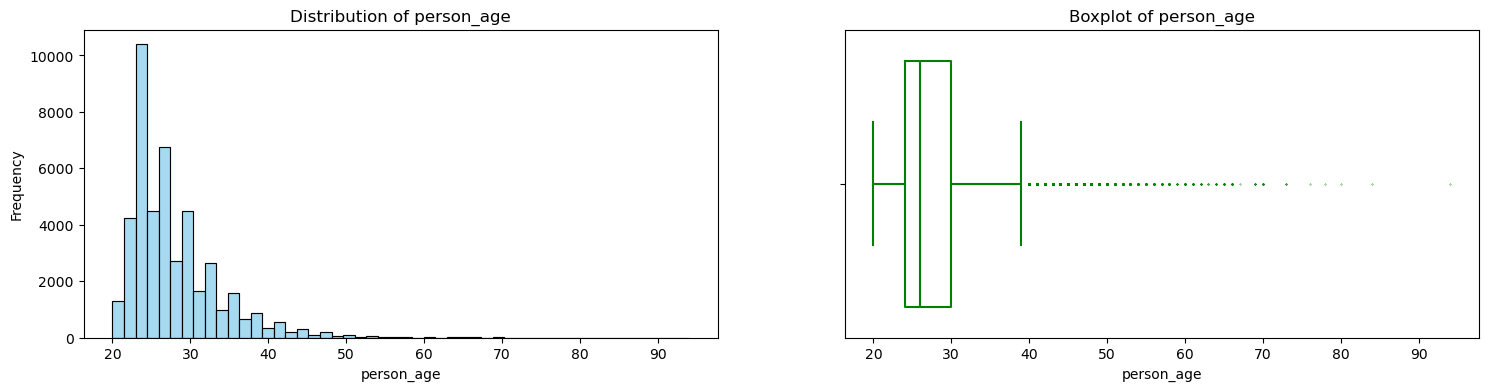

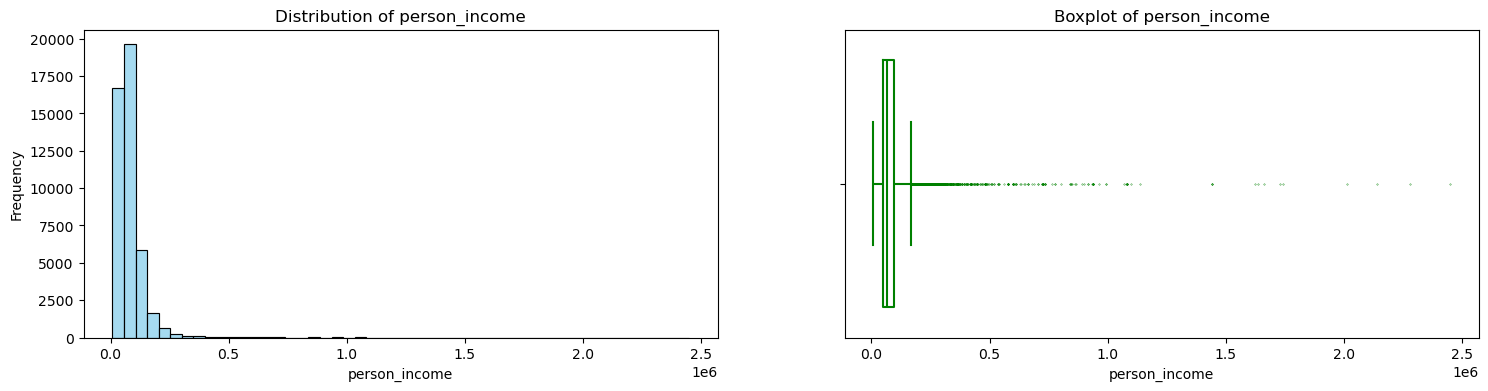

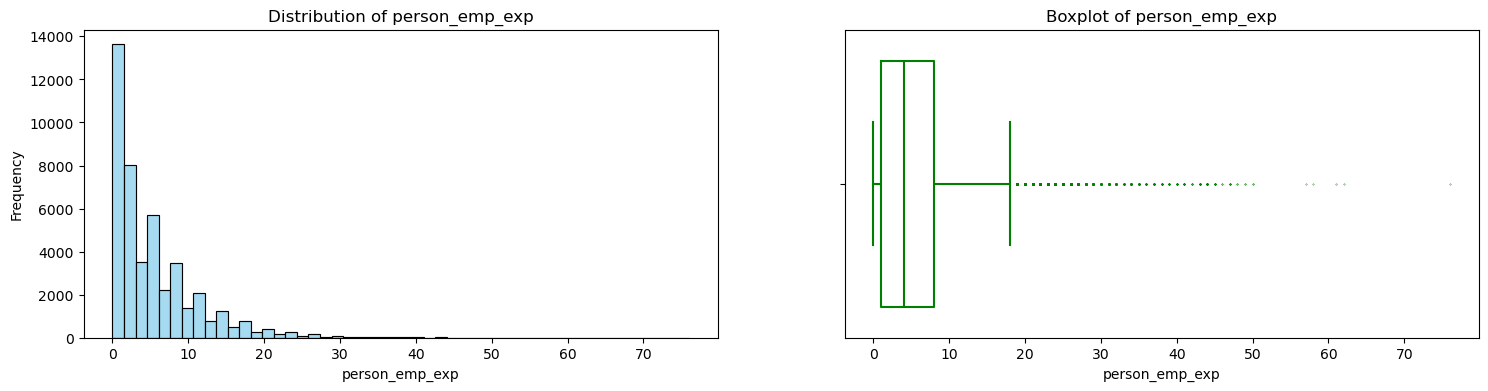

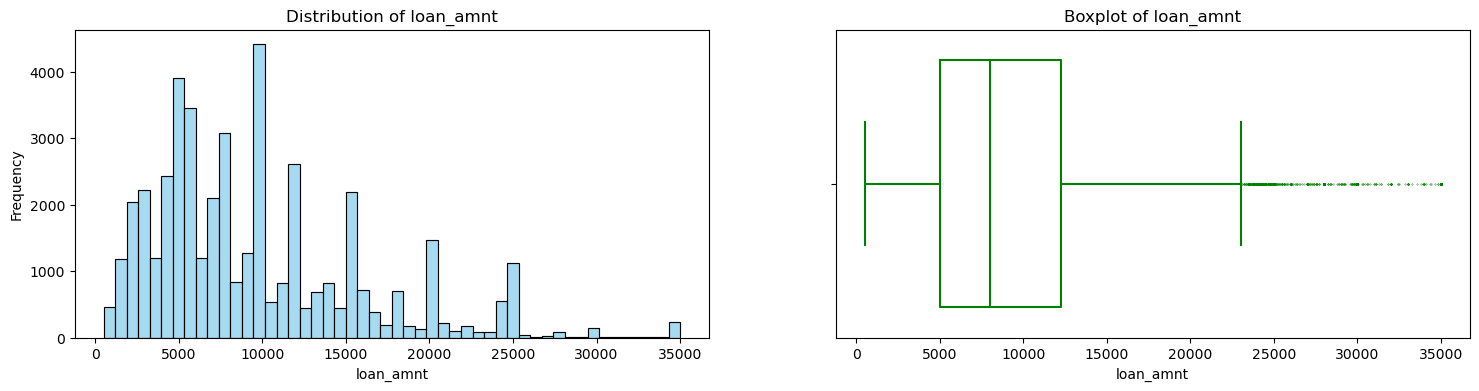

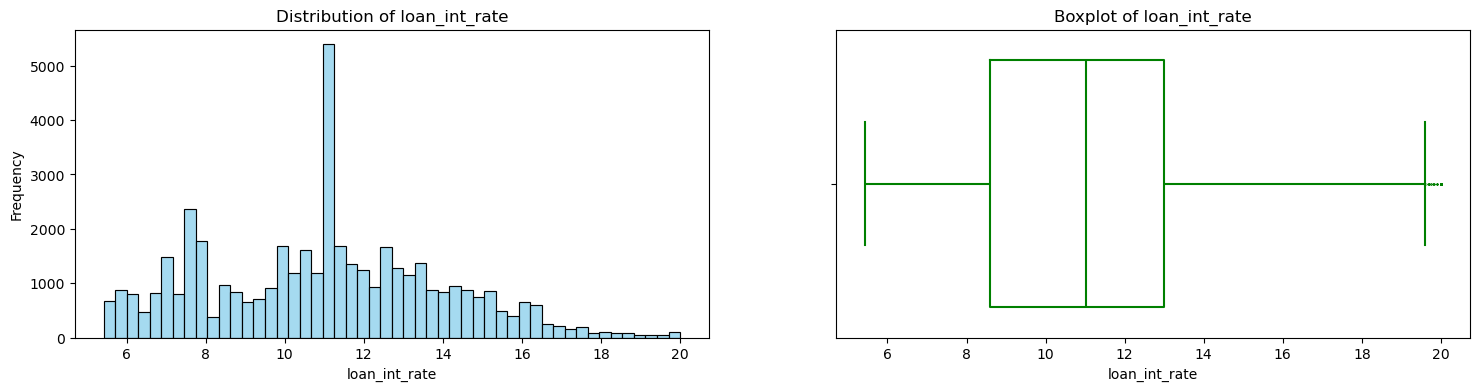

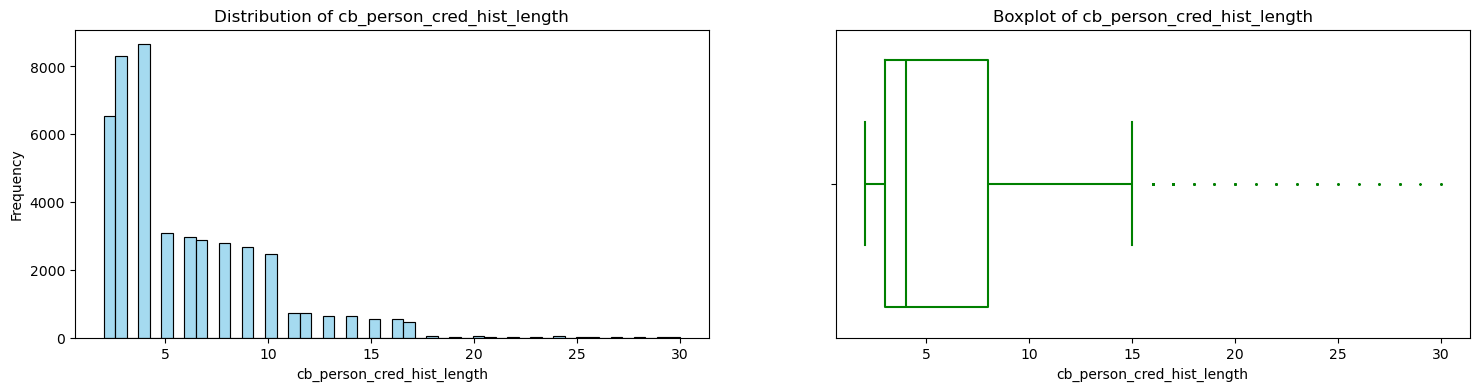

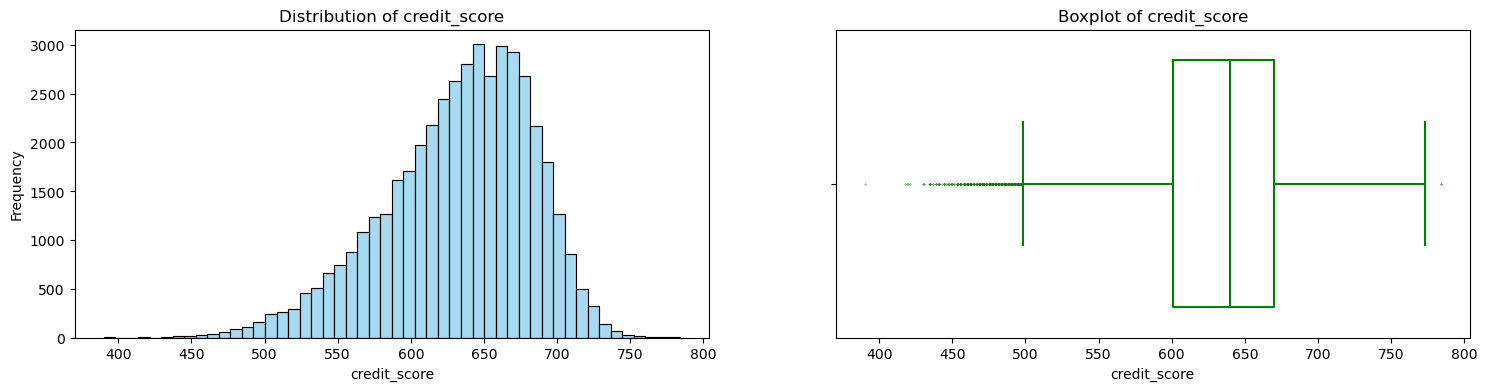

In [13]:
for column in table_cont.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))

    sns.histplot(data[column], kde=False, color='skyblue', ax=ax1, bins=50)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')

    sns.boxplot(x=data[column], color='green', ax=ax2, fill=False, fliersize=0.3)
    ax2.set_title(f'Boxplot of {column}')

### Categorical Variables Summary Table

In [14]:
table_cat = data.select_dtypes(include="object").assign(loan_status = data["loan_status"].astype("str")).describe()
table_cat.style.format(precision = 2, thousands = ".", decimal = ",")

### Distribution of Categorical Features

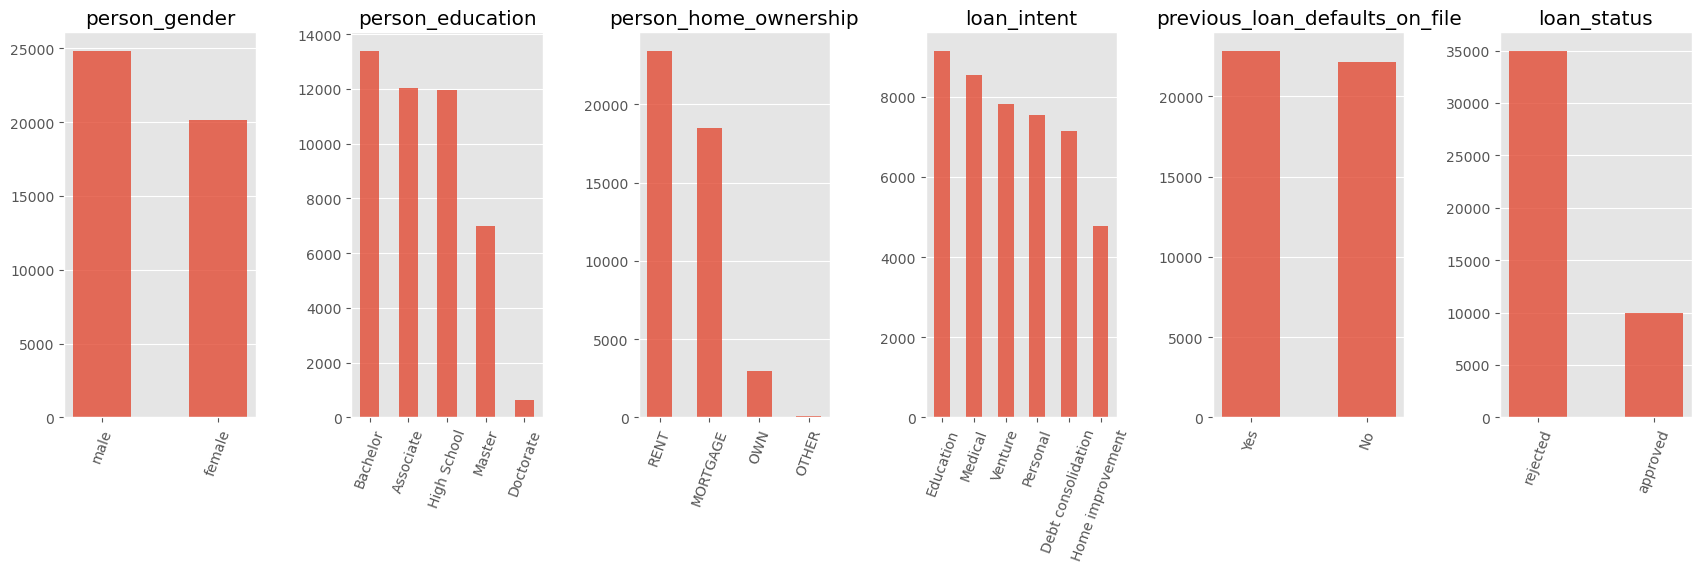

In [15]:
plt.style.use("ggplot")
cat_data = data.select_dtypes(include = "object").assign(loan_status = data["loan_status"].map({0:"rejected", 1:"approved"}))
cols = cat_data.columns.to_list()

plt.figure(figsize = (21, 5), dpi = 100)
for item in enumerate(cols):
    plt.subplot(1, 6, (item[0] + 1))
    counts = cat_data[item[1]].value_counts()
    plt.bar(x = counts.index, height=counts.values, width=0.5, alpha = 0.8)
    plt.xticks(rotation = 70)
    plt.title(f"{item[1]}")
    plt.grid(visible=False, axis = "x")

plt.subplots_adjust(hspace = 0.8, wspace= 0.5)
plt.show()

### Correlation Heatmap

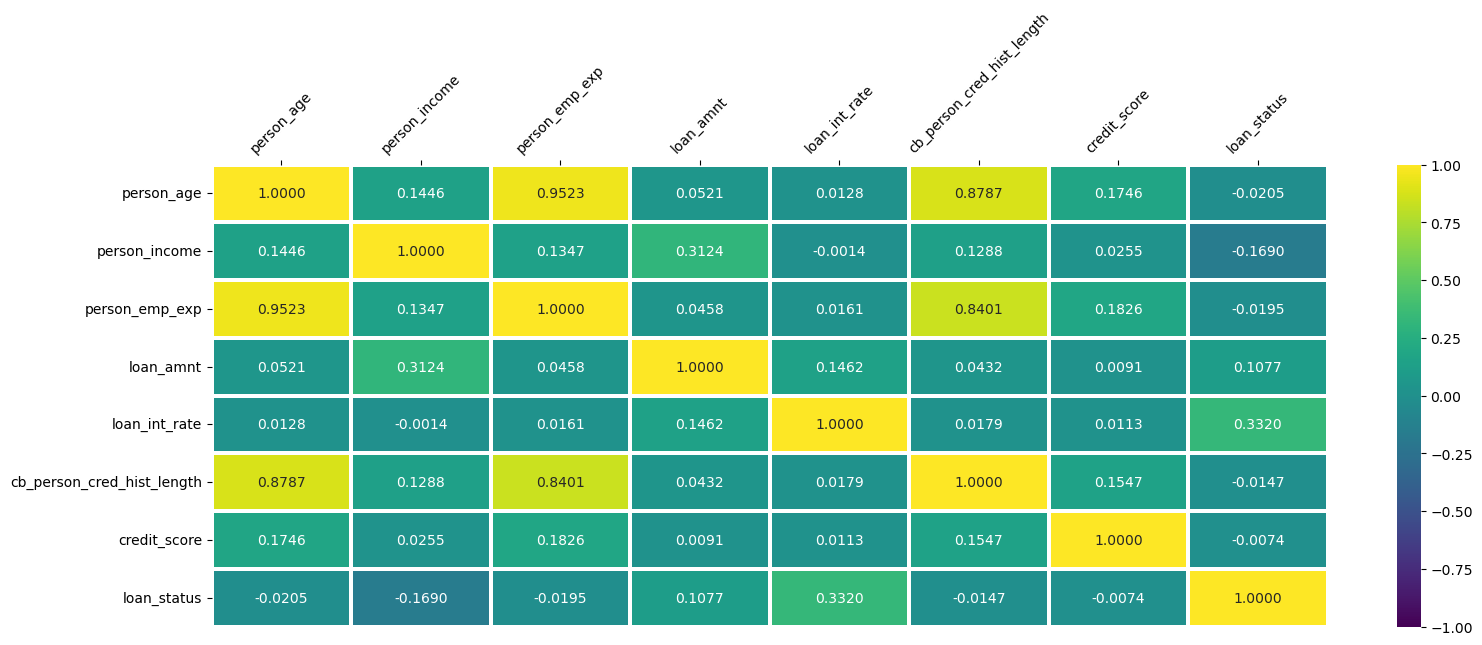

In [16]:
plt.style.use("default")
corr_matris = data.select_dtypes(include="number").corr()
ax = sns.heatmap(corr_matris, 
            vmax= 1,
            vmin= -1,
            annot= True, 
            linewidths = 1.5, 
            robust= True, 
            center = 0, 
            fmt = ".4f", 
            cmap = "viridis"
            )
plt.gcf().set_size_inches(18, 6)
ax.set(xlabel = "", ylabel = "")
ax.xaxis.tick_top()
plt.xticks(rotation = 45);

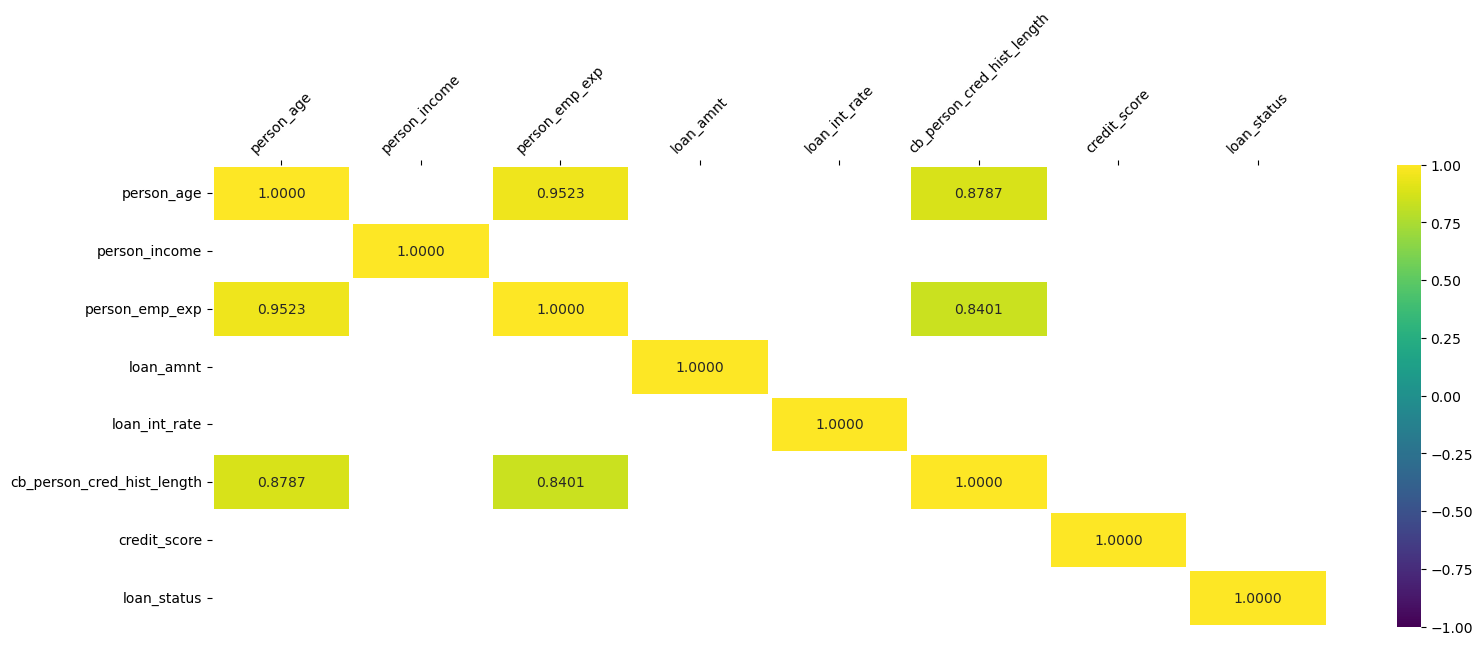

In [18]:
plt.style.use("default")
corr_matris = data.select_dtypes(include="number").corr()
ax = sns.heatmap(corr_matris, 
            vmax= 1,
            vmin= -1,
            annot= True, 
            linewidths = 1.5, 
            robust= True, 
            center = 0, 
            fmt = ".4f", 
            cmap = "viridis",
            mask=((corr_matris < 0.50) & (corr_matris > -0.50)).values
            )
plt.gcf().set_size_inches(18, 6)
ax.set(xlabel = "", ylabel = "")
ax.xaxis.tick_top()
plt.xticks(rotation = 45);

### Person Income vs Key Factors by Loan Status

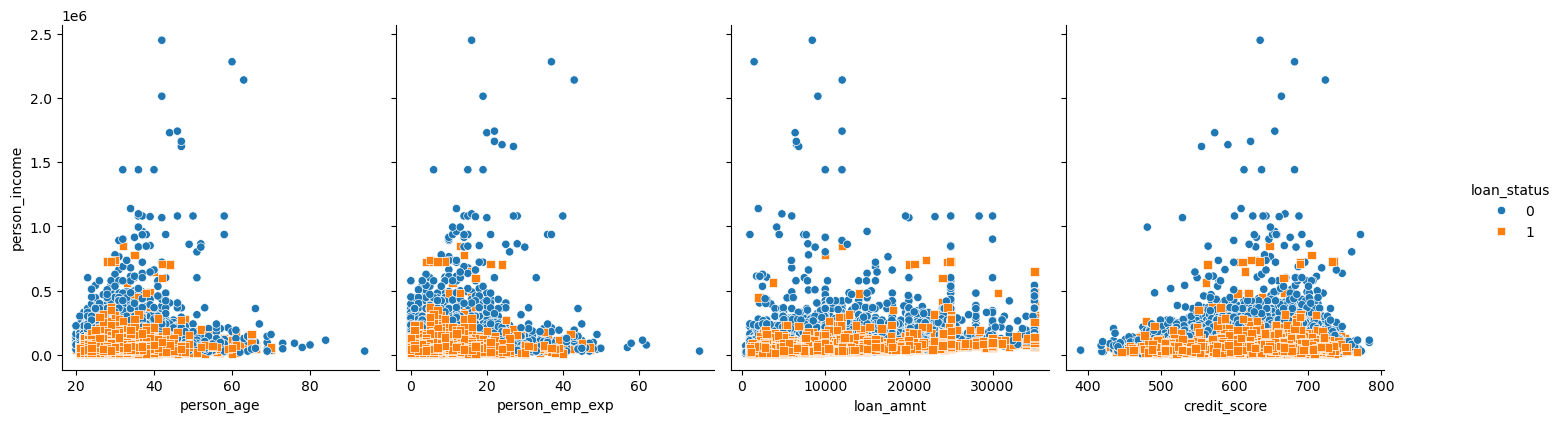

In [19]:
g = sns.pairplot(data = data, 
             x_vars=["person_age", "person_emp_exp", "loan_amnt", "credit_score"],
             y_vars=["person_income"],
             hue="loan_status",
             markers=["o", "s"],
             
             )

plt.gcf().set_size_inches(16, 5)

### ViolinPlots

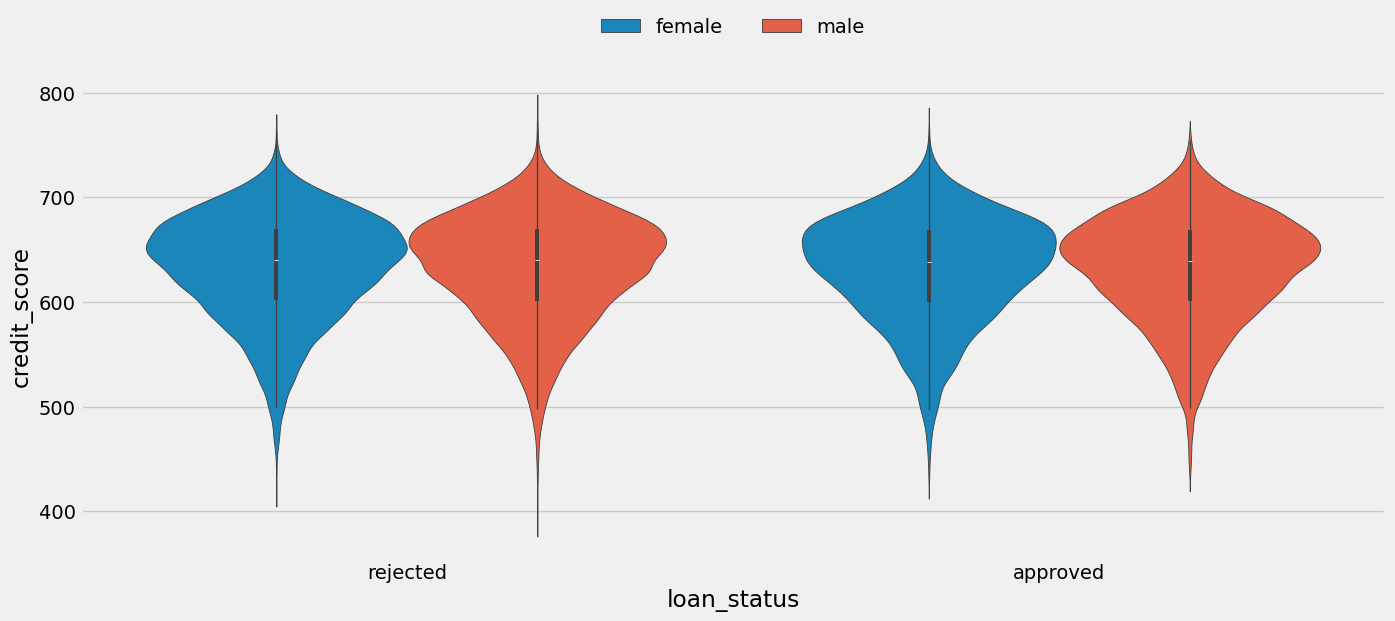

In [20]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 6), dpi = 100)
sns.violinplot(data = data, y = "credit_score", x = "loan_status", hue = "person_gender")
plt.legend(loc = "upper center", bbox_to_anchor = (0.50 , 1.15), ncols = 2, framealpha = 0.01)
plt.xticks([0, 1], labels=["rejected", "approved"]);

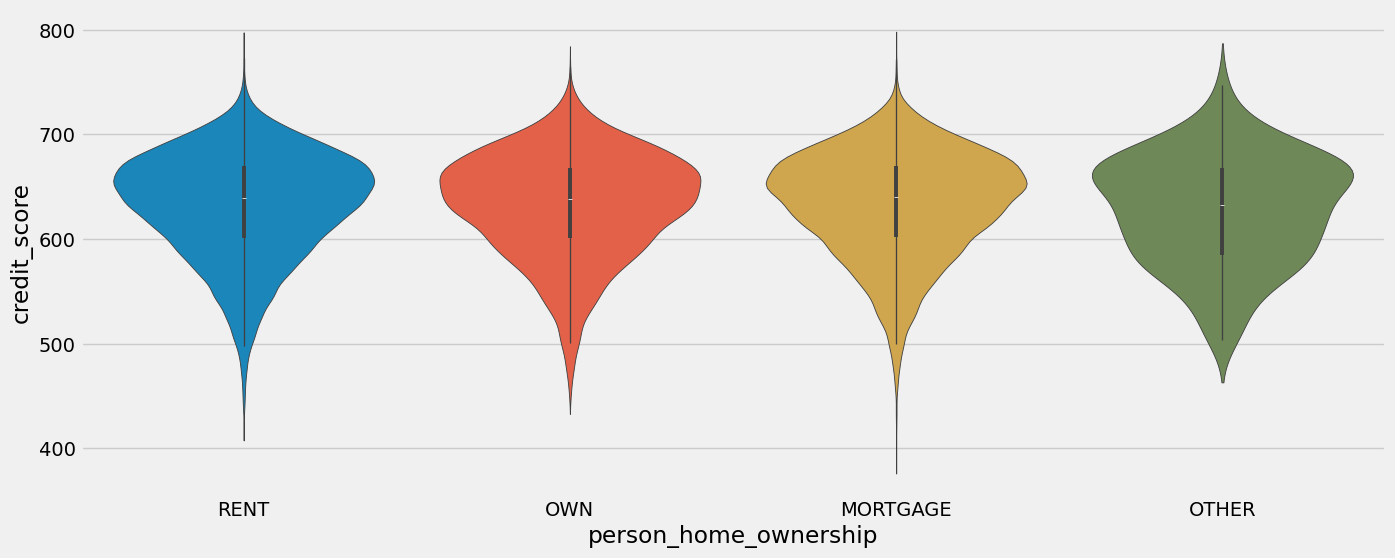

In [21]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 6), dpi = 100)
sns.violinplot(data = data, y = "credit_score", x = "person_home_ownership", hue = "person_home_ownership");

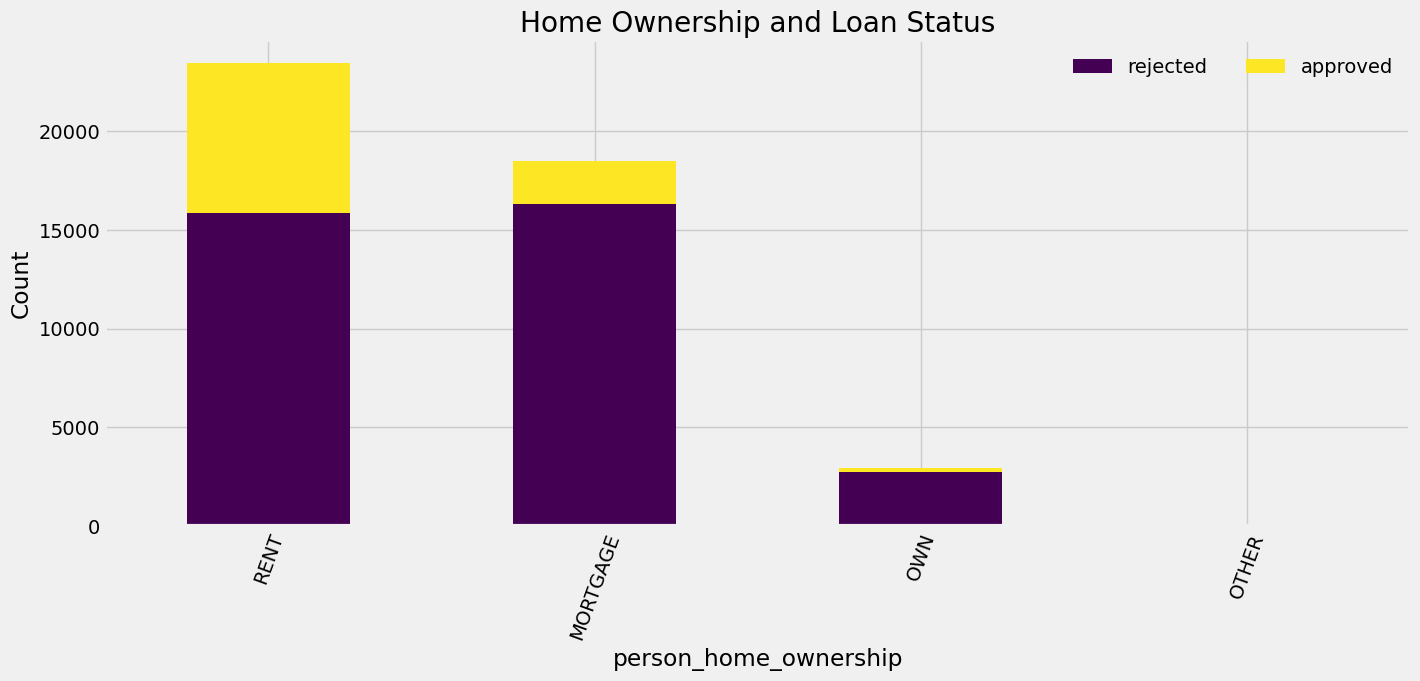

In [22]:
plt.style.use("fivethirtyeight")
cross_tab = pd.crosstab(data["person_home_ownership"], data["loan_status"]).sort_values(by = 1, ascending = False)
cross_tab.plot(kind='bar', stacked=True, figsize=(15, 6), colormap='viridis')
plt.xticks(rotation = 70)
plt.legend(loc = "upper right", ncols = 2, framealpha = 0.01, labels = ["rejected", "approved"])
plt.ylabel("Count")
plt.title("Home Ownership and Loan Status");

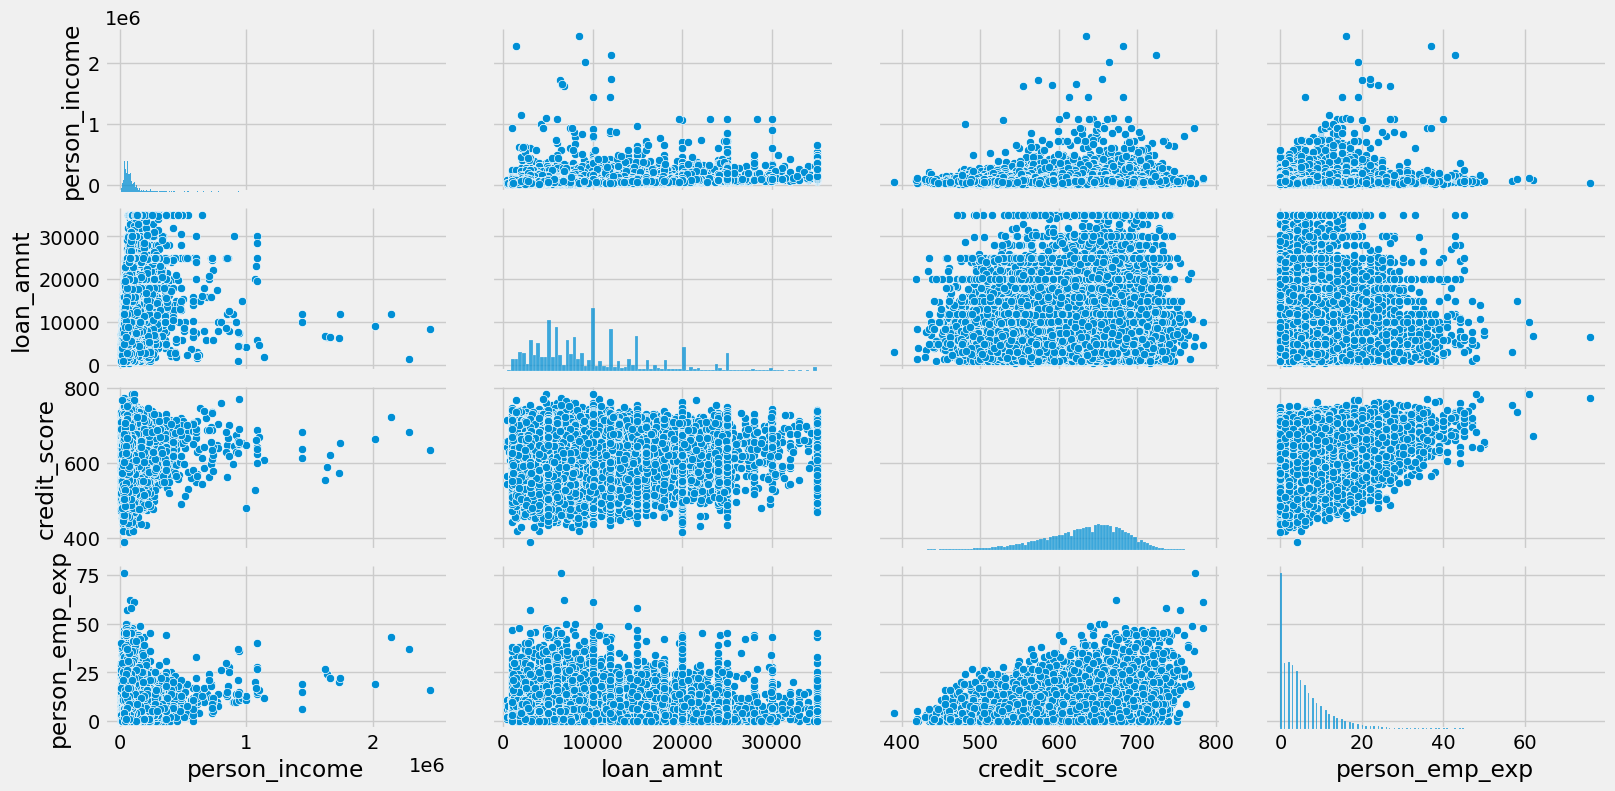

In [23]:
sns.pairplot(data[["person_income", "loan_amnt", "credit_score", "person_emp_exp"]], diag_kind="hist", diag_kws=dict(fill=True))
plt.gcf().set_size_inches(15, 7)
plt.gcf().subplots_adjust(5, 12, 6, 13)

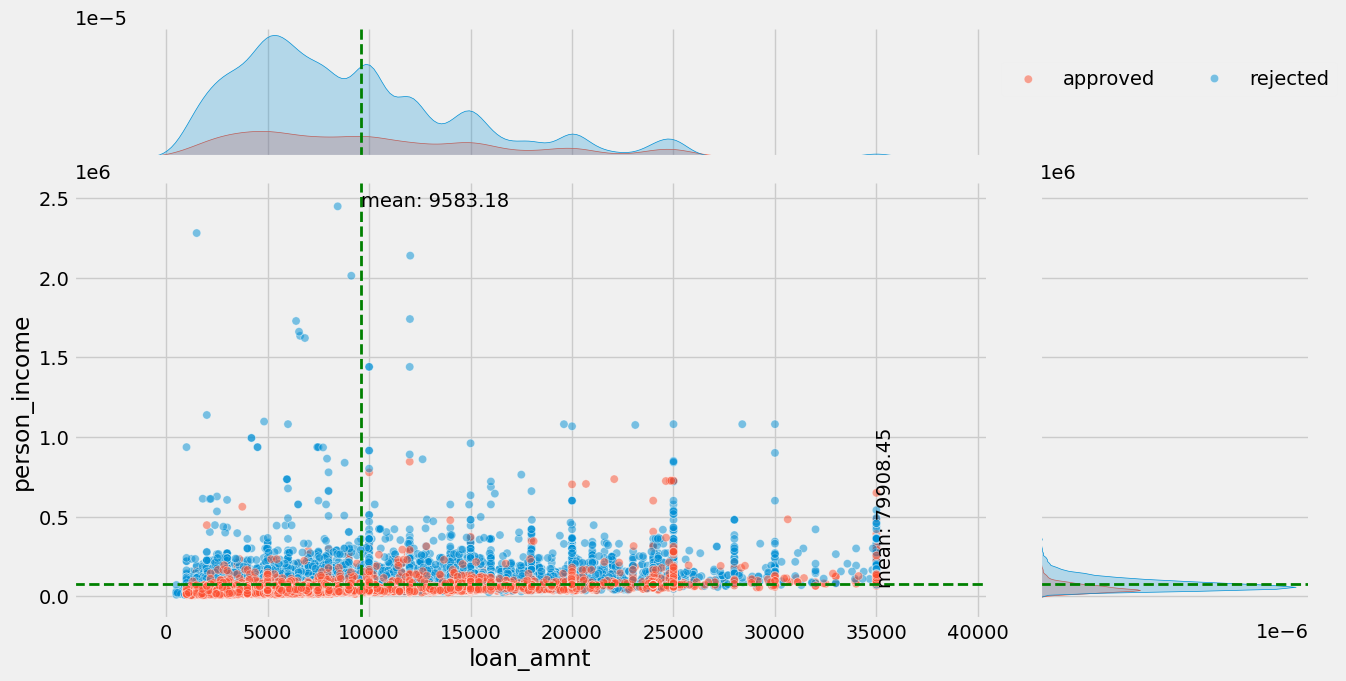

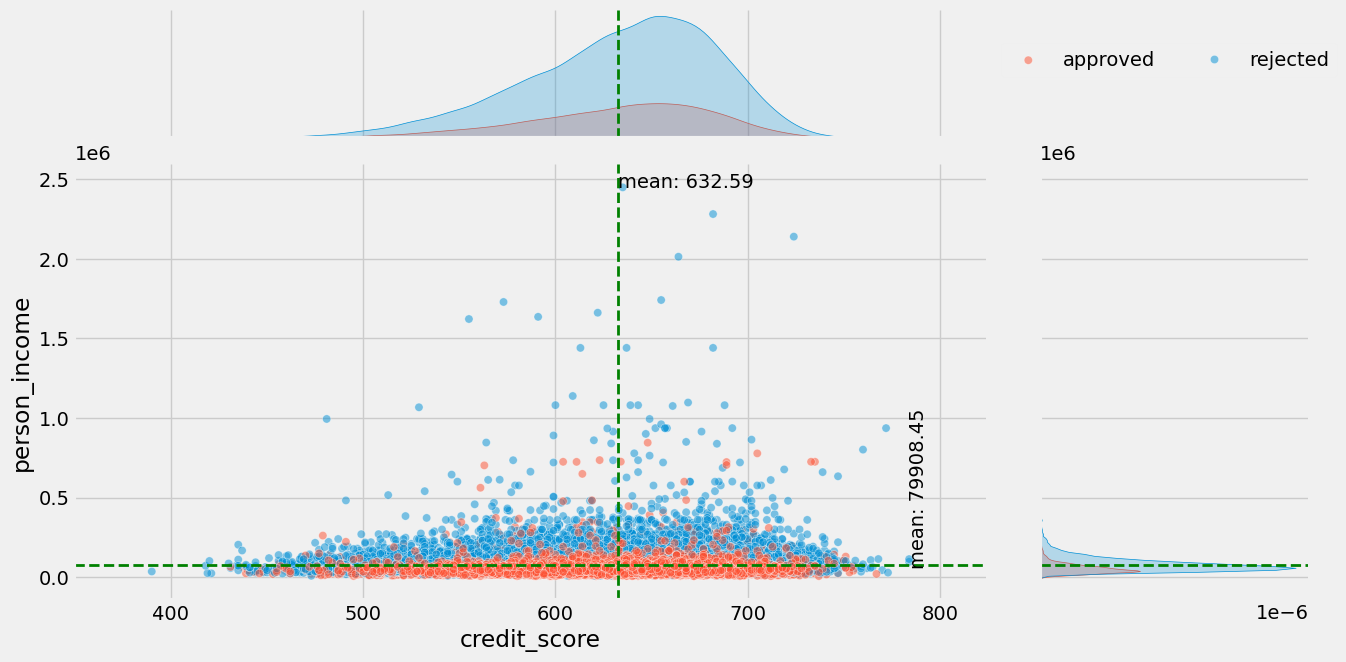

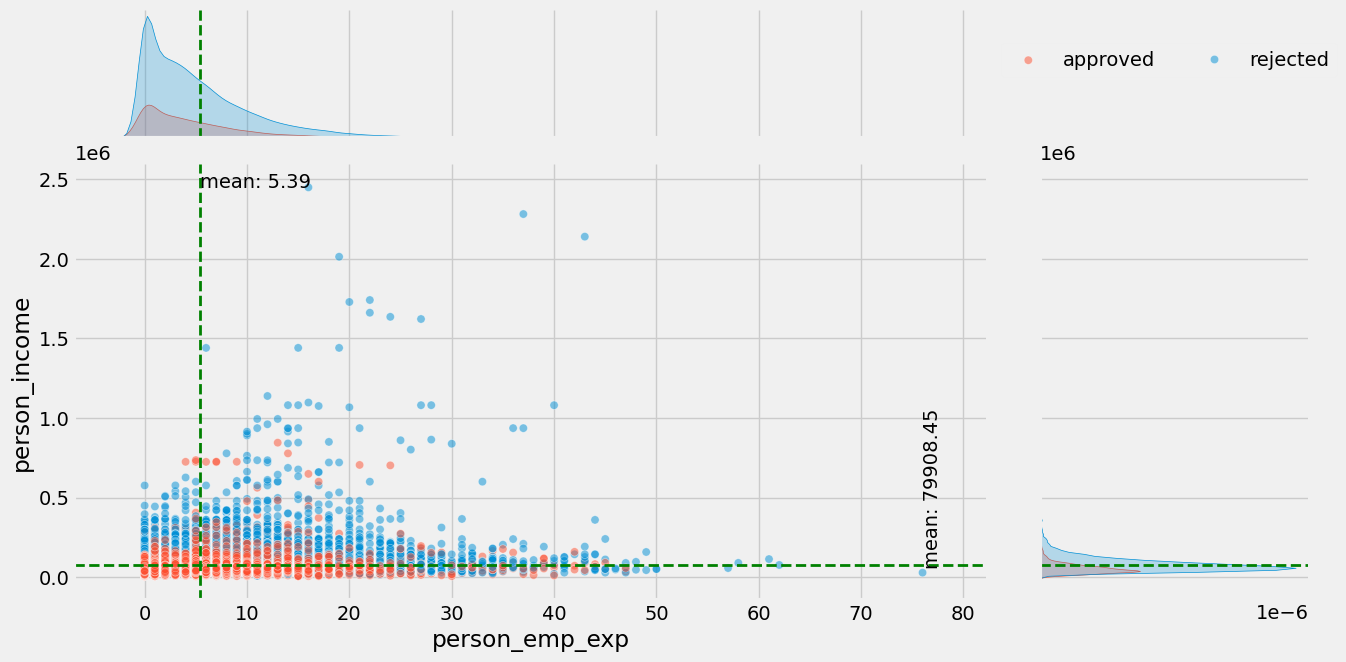

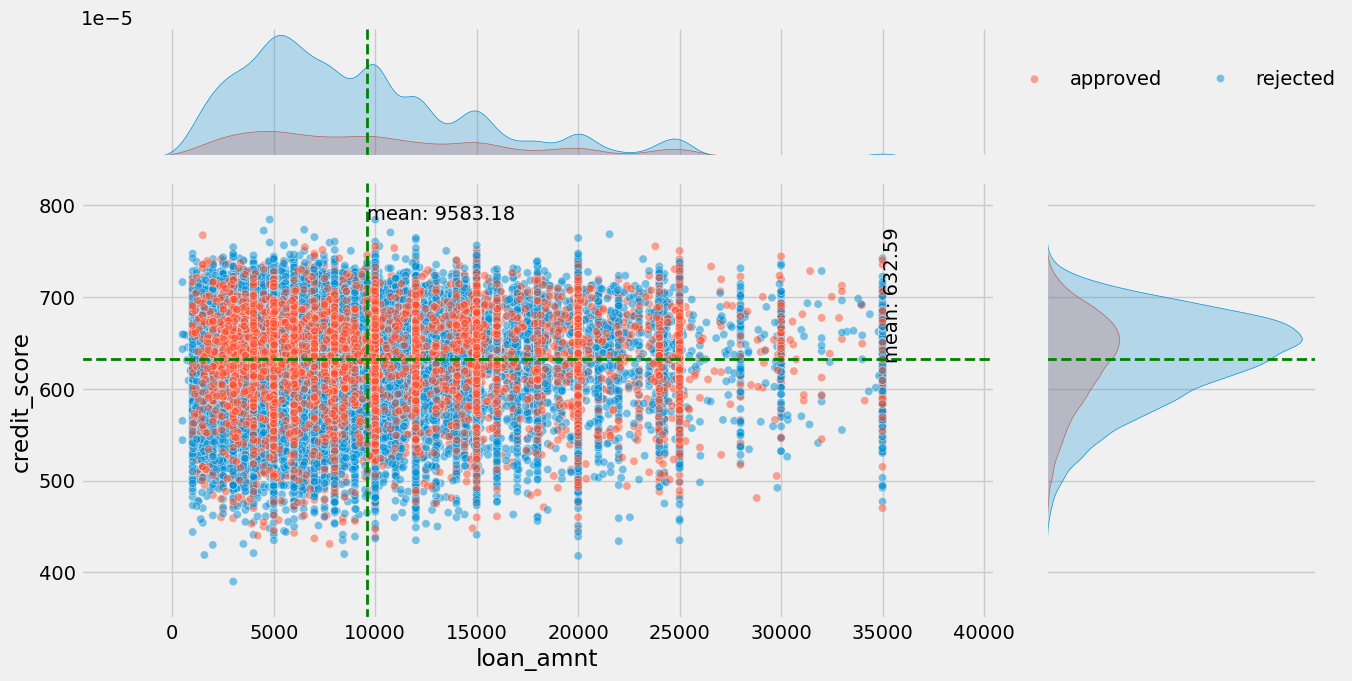

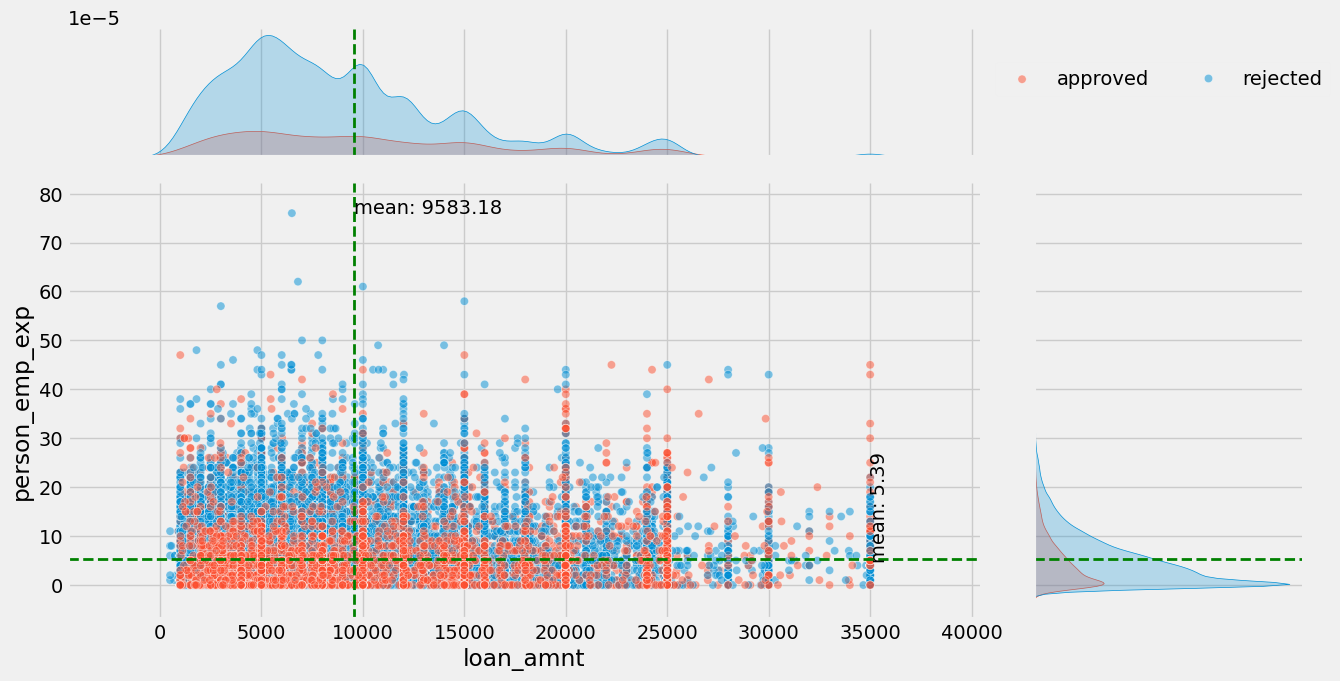

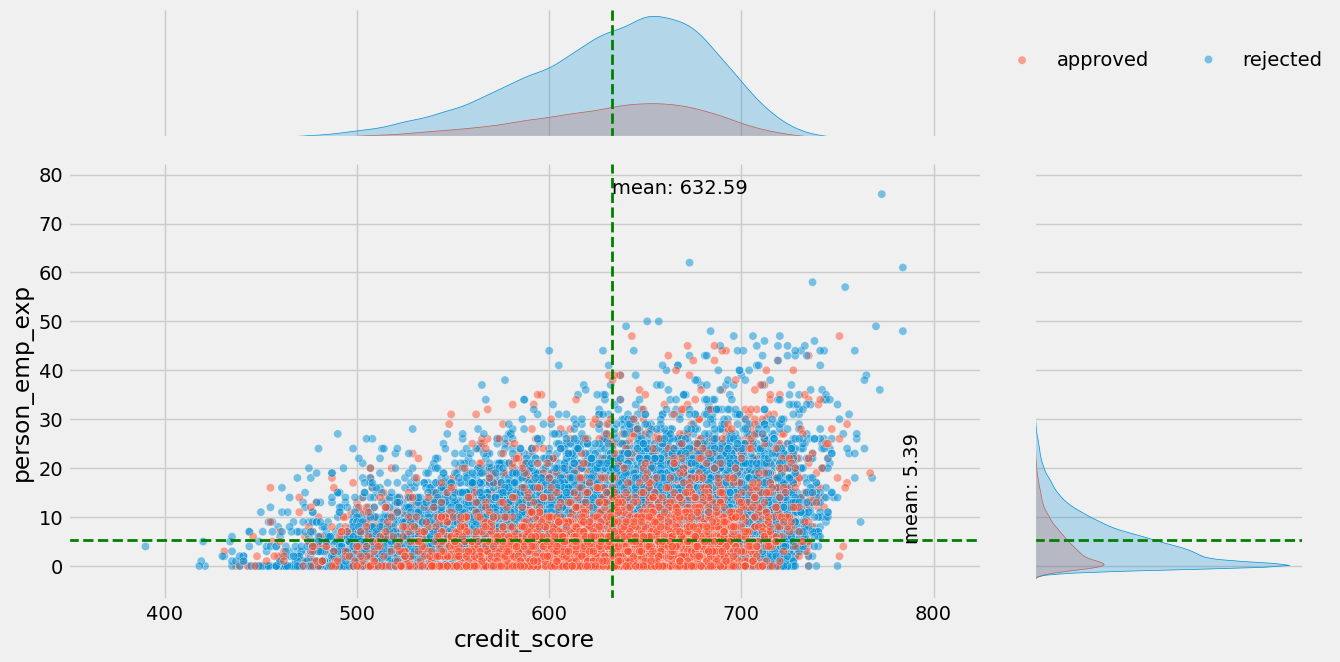

In [24]:
def joint_plot(x, y):
    
    plt.style.use("fivethirtyeight")
    plot = sns.jointplot(data = data, x = x, y = y, ratio = 3, hue = "loan_status", alpha = 0.5, marginal_ticks=False)
    plot.refline(x=data[x].mean(), y=data[y].mean(), marginal=True, lw = 2, color = "green")
    plt.gcf().set_size_inches(15, 7)
    plt.text(x = data[x].mean(), y = np.max(data[y]), s = f"mean: {data[x].mean():.2f}", fontdict={"color": "black"})
    plt.text(x = np.max(data[x]), y = data[y].mean(), s = f"mean: {data[y].mean():.2f}", fontdict={"color": "black", "rotation": 90})
    plt.legend(loc = "upper center", bbox_to_anchor = (1.20, 1.30), ncols = 2, labels = ["approved", "rejected"],  framealpha = 0.01)
    plt.grid("off")

joint_plot("loan_amnt", "person_income")
joint_plot("credit_score", "person_income")
joint_plot("person_emp_exp", "person_income")
joint_plot("loan_amnt", "credit_score")
joint_plot("loan_amnt", "person_emp_exp")
joint_plot("credit_score", "person_emp_exp")

### Education Level vs Credit Score

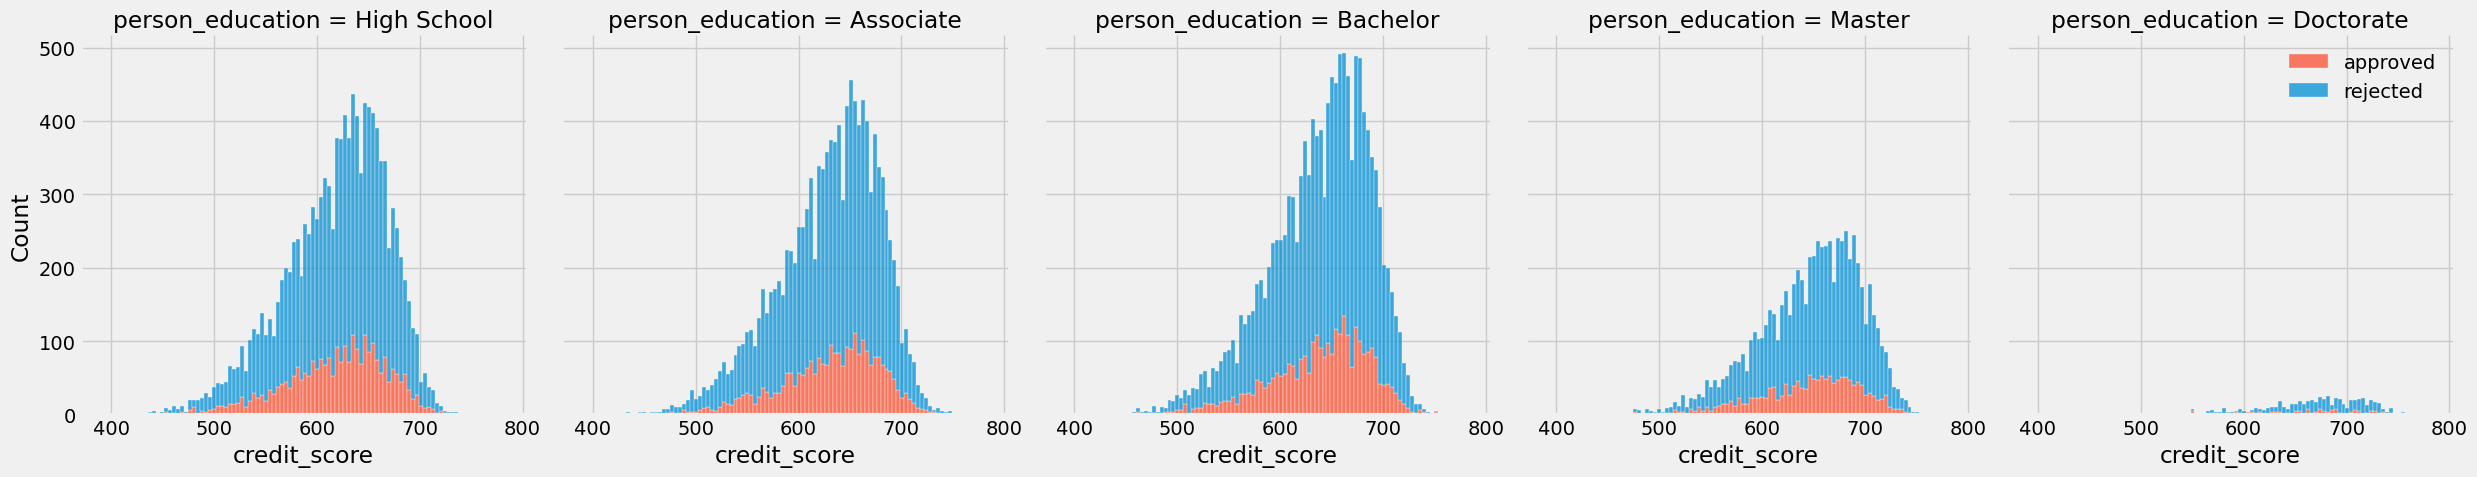

In [25]:
sns.displot(data = data, 
            x = "credit_score", 
            col = "person_education",  
            hue = "loan_status", 
            multiple = "stack", 
            col_order=["High School", "Associate", "Bachelor", "Master", "Doctorate"], 
            legend=False)

plt.legend(labels = ["approved", "rejected"], framealpha = 0.01);

# Models and Hyperparameter Tuning

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

In [28]:
model_pipe = Pipeline([
    ("transformer", cols_transformed),
    ("model", [])
])

## Logistic Regression

In [29]:
params = [
    {
        "model": [LogisticRegression()],
        "model__penalty": ['l1', 'l2', 'elasticnet', None],
        "model__max_iter": [200, 500, 750],
        "model__C": [0.1, 1, 10],
        "model__l1_ratio": [0.25, 0.5, 0.75]
    }
]

grid_log = GridSearchCV(
    estimator=model_pipe,
    param_grid=params,
    n_jobs= -1,
    cv = 5,
    scoring = "accuracy",
    verbose=2
)

grid_log.fit(x_train, y_train)
grid_log.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder_label',
                                                  Pipeline(steps=[('label '
                                                                   'encoder',
                                                                   OrdinalEncoder())]),
                                                  ['person_gender',
                                                   'previous_loan_defaults_on_file']),
                                                 ('encoder_ohe',
                                                  Pipeline(steps=[('one-hot '
                                                                   'encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['person_home_ownership',
                                                   'loan_intent'...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt',
                                                   'cb_person_cred_hist_length']),
                                                 ('std_scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_int_rate',
                                                   'credit_score'])])),
                ('model',
                 LogisticRegression(C=0.1, l1_ratio=0.25, max_iter=200))])

### Best HyperParameters

In [30]:
best_params = pd.DataFrame(grid_log.best_params_, index = [0]).set_index("model");best_params

model__C  model__l1_ratio  model__max_iter  \
model                                                              
LogisticRegression()       0.1             0.25              200   

                     model__penalty  
model                                
LogisticRegression()             l2

### Val and Test Scores

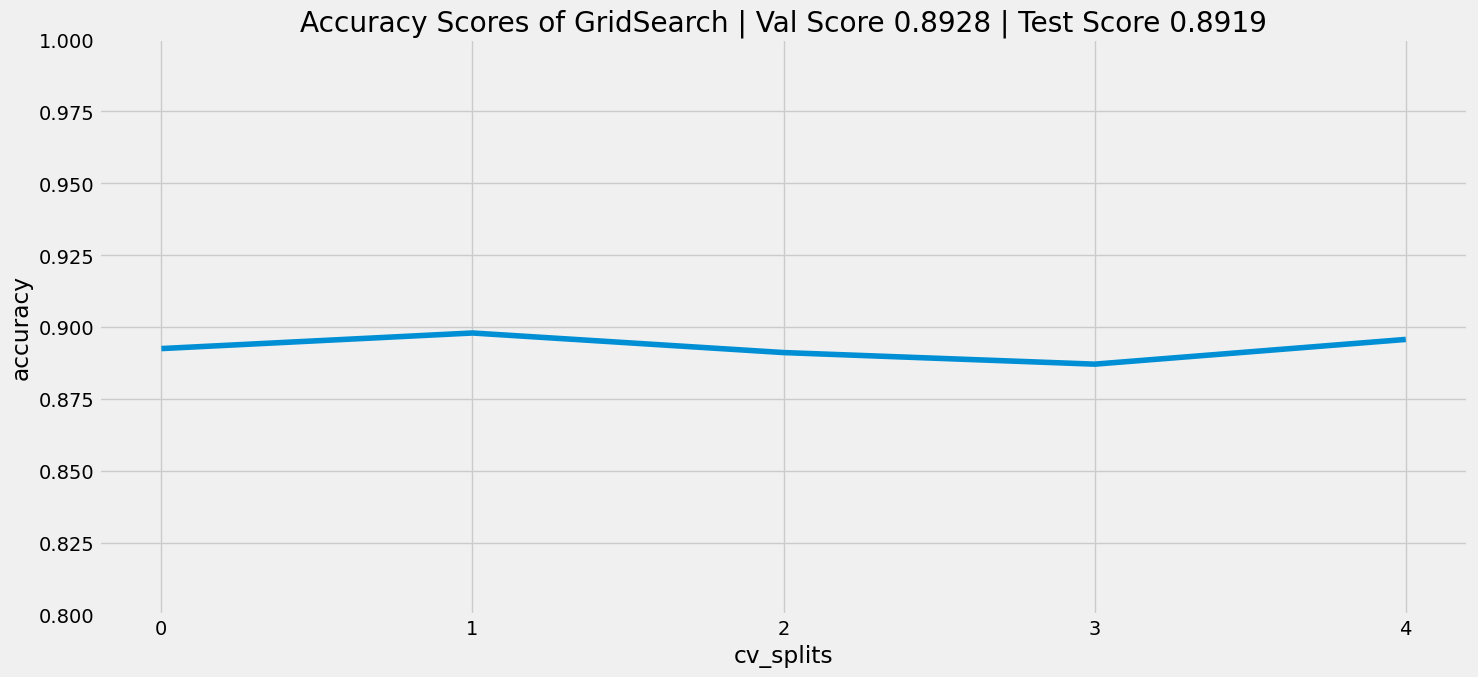

In [31]:
pd.DataFrame(grid_log.cv_results_).sort_values(by = "rank_test_score").iloc[0, -8:-3].plot()
plt.xticks(range(5), labels=range(5))
plt.xlabel("cv_splits")
plt.ylabel("accuracy")
plt.ylim(0.8, 1)
plt.gcf().set_size_inches(15, 7)
plt.title(f"Accuracy Scores of GridSearch | Val Score {grid_log.best_score_:.4f} | Test Score {grid_log.score(x_test, y_test):.4f}")
plt.tight_layout()

### ROC Curve

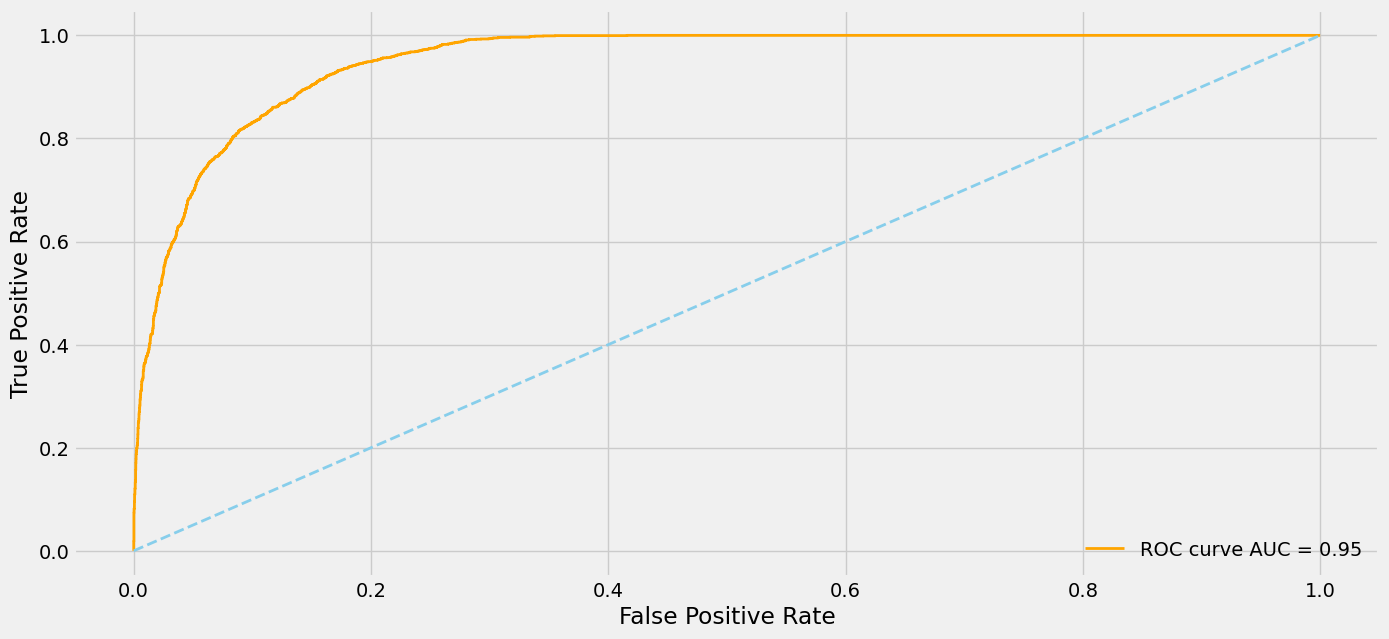

In [32]:
y_pred_log = grid_log.predict(x_test)
y_score = grid_log.predict_proba(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])

roc_auc_log = auc(fpr, tpr)

plt.plot(fpr, tpr, color="orange", lw=2, label=f'ROC curve AUC = {roc_auc_log:.2f}')
plt.plot([0, 1], [0, 1], color="skyblue", lw=2, linestyle="--")
plt.legend(loc="lower right", framealpha = 0)
plt.gcf().set_size_inches(15, 7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate");

### Classification Report

In [33]:
pd.DataFrame(classification_report(y_test, y_pred_log, output_dict=True)).rename({"0": "rejected-0", "1":"approved-1"}, axis = 1).T

precision    recall  f1-score      support
rejected-0     0.934526  0.925847  0.930166  6999.000000
approved-1     0.748668  0.773000  0.760640  2000.000000
accuracy       0.891877  0.891877  0.891877     0.891877
macro avg      0.841597  0.849423  0.845403  8999.000000
weighted avg   0.893219  0.891877  0.892489  8999.000000

### Confusion Matrix

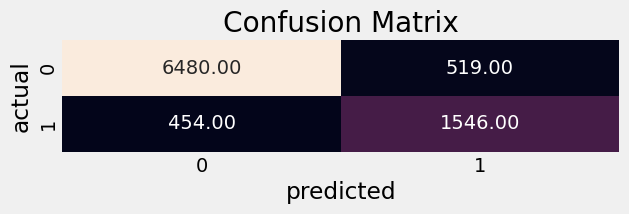

In [34]:
g = sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt=".2f", cbar=False)
g.set_ylabel("actual")
g.set_xlabel("predicted")
g.set_title("Confusion Matrix")
g.set_aspect(0.2)


## K-Nearest Neighbors (KNN)

In [35]:
params = [
    {
        "model": [KNeighborsClassifier()],
        "model__n_neighbors":[15, 20, 30, 50],
        "model__weights": ['uniform', 'distance'],
        "model__algorithm": ['brute', 'ball_tree', 'kd_tree'],
        "model__leaf_size": [10, 30, 50],
        "model__p":[1, 2]
    }

]

grid_knn = GridSearchCV(
    estimator=model_pipe,
    param_grid=params,
    n_jobs= -1,
    cv = 5,
    scoring= "accuracy",
    verbose=2
)

grid_knn.fit(x_train, y_train)
grid_knn.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder_label',
                                                  Pipeline(steps=[('label '
                                                                   'encoder',
                                                                   OrdinalEncoder())]),
                                                  ['person_gender',
                                                   'previous_loan_defaults_on_file']),
                                                 ('encoder_ohe',
                                                  Pipeline(steps=[('one-hot '
                                                                   'encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['person_home_ownership',
                                                   'loan_intent'...
                                                                                       func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt',
                                                   'cb_person_cred_hist_length']),
                                                 ('std_scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_int_rate',
                                                   'credit_score'])])),
                ('model',
                 KNeighborsClassifier(algorithm='brute', leaf_size=10,
                                      n_neighbors=20, p=1,
                                      weights='distance'))])

### Best HyperParameters

In [36]:
best_params = pd.DataFrame(grid_knn.best_params_, index = [0]).set_index("model");best_params

model__algorithm  model__leaf_size  model__n_neighbors  \
model                                                                           
KNeighborsClassifier()            brute                10                  20   

                        model__p model__weights  
model                                            
KNeighborsClassifier()         1       distance

### Val and Test Scores

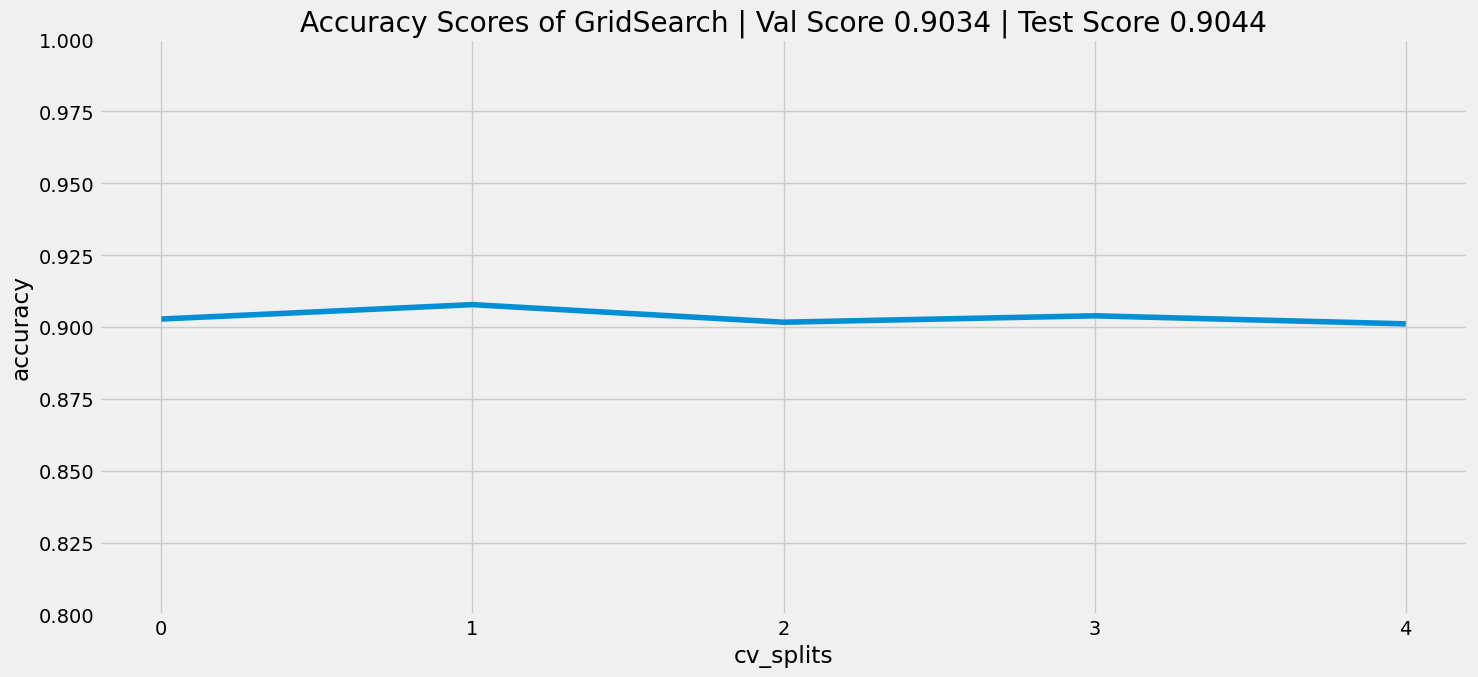

In [37]:
pd.DataFrame(grid_knn.cv_results_).sort_values(by = "rank_test_score").iloc[0, -8:-3].plot()
plt.xticks(range(5), labels=range(5))
plt.xlabel("cv_splits")
plt.ylabel("accuracy")
plt.ylim(0.8, 1)
plt.gcf().set_size_inches(15, 7)
plt.title(f"Accuracy Scores of GridSearch | Val Score {grid_knn.best_score_:.4f} | Test Score {grid_knn.score(x_test, y_test):.4f}")
plt.tight_layout()

### ROC Curve

Text(0, 0.5, 'True Positive Rate')

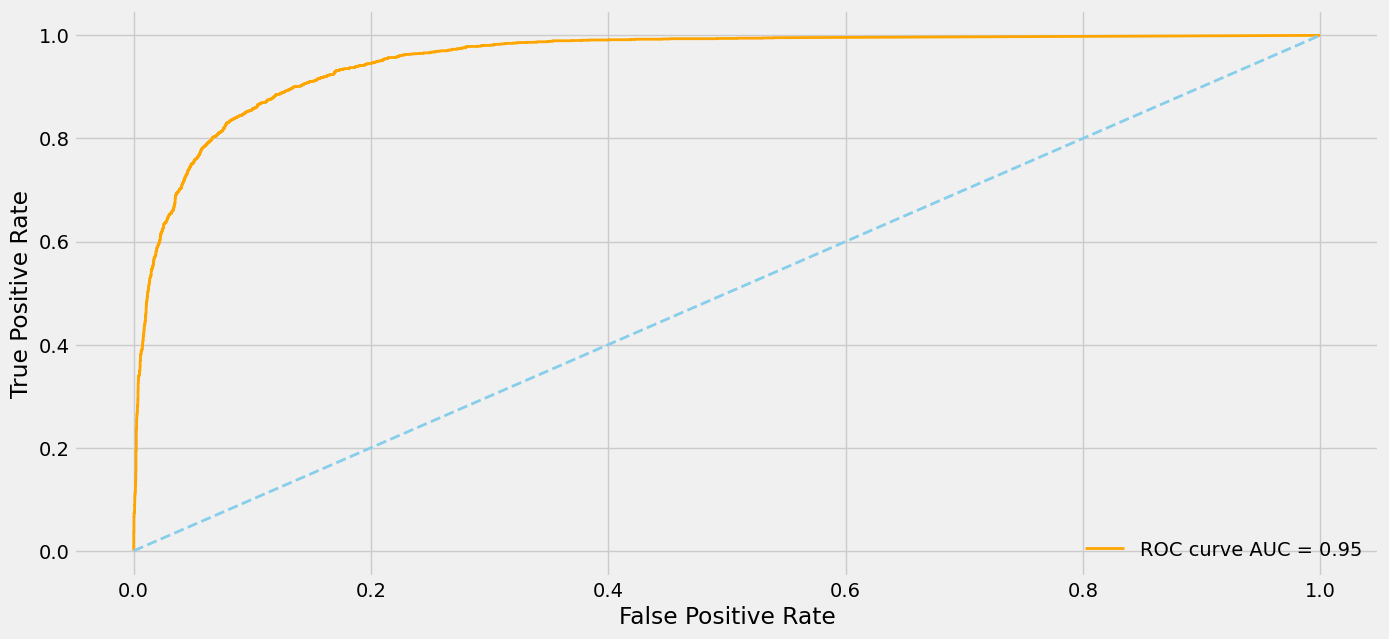

In [38]:
y_pred_knn = grid_knn.predict(x_test)
y_score_knn = grid_knn.predict_proba(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score_knn[:, 1])

roc_auc_knn = auc(fpr, tpr)

plt.plot(fpr, tpr, color="orange", lw=2, label=f'ROC curve AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], color="skyblue", lw=2, linestyle="--")
plt.legend(loc="lower right", framealpha = 0)
plt.gcf().set_size_inches(15, 7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

### Classification Report

In [39]:
y_pred_knn = grid_knn.predict(x_test)
pd.DataFrame(classification_report(y_test, y_pred_knn, output_dict=True)).rename({"0": "rejected-0", "1":"approved-1"}, axis = 1).T

precision    recall  f1-score      support
rejected-0     0.922389  0.957708  0.939717  6999.000000
approved-1     0.829099  0.718000  0.769561  2000.000000
accuracy       0.904434  0.904434  0.904434     0.904434
macro avg      0.875744  0.837854  0.854639  8999.000000
weighted avg   0.901656  0.904434  0.901900  8999.000000

### Confusion Matrix

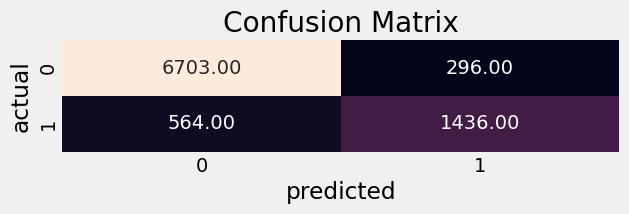

In [40]:
g = sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt=".2f", cbar=False)
g.set_ylabel("actual")
g.set_xlabel("predicted")
g.set_title("Confusion Matrix")
g.set_aspect(0.2)

## Support Vector Machines (SVM)

In [41]:
params = [
    {
        "model": [SVC(probability=True)],
        "model__C": [10],
        "model__kernel": ["rbf"],
        "model__gamma": [1,0.1,0.01,0.001]  
    }
]

grid_svc = GridSearchCV(
    estimator=model_pipe,
    param_grid=params,
    cv=5,
    n_jobs= -1,
    scoring="accuracy",
    verbose = 2
)
grid_svc.fit(x_train, y_train)
grid_svc.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder_label',
                                                  Pipeline(steps=[('label '
                                                                   'encoder',
                                                                   OrdinalEncoder())]),
                                                  ['person_gender',
                                                   'previous_loan_defaults_on_file']),
                                                 ('encoder_ohe',
                                                  Pipeline(steps=[('one-hot '
                                                                   'encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['person_home_ownership',
                                                   'loan_intent'...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt',
                                                   'cb_person_cred_hist_length']),
                                                 ('std_scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_int_rate',
                                                   'credit_score'])])),
                ('model', SVC(C=10, gamma=0.1, probability=True))])

### Best HyperParameters

In [42]:
best_params = pd.DataFrame(grid_svc.best_params_, index = [0]).set_index("model");best_params

model__C  model__gamma model__kernel
model                                                      
SVC(probability=True)        10           0.1           rbf

### Val And Test Scores

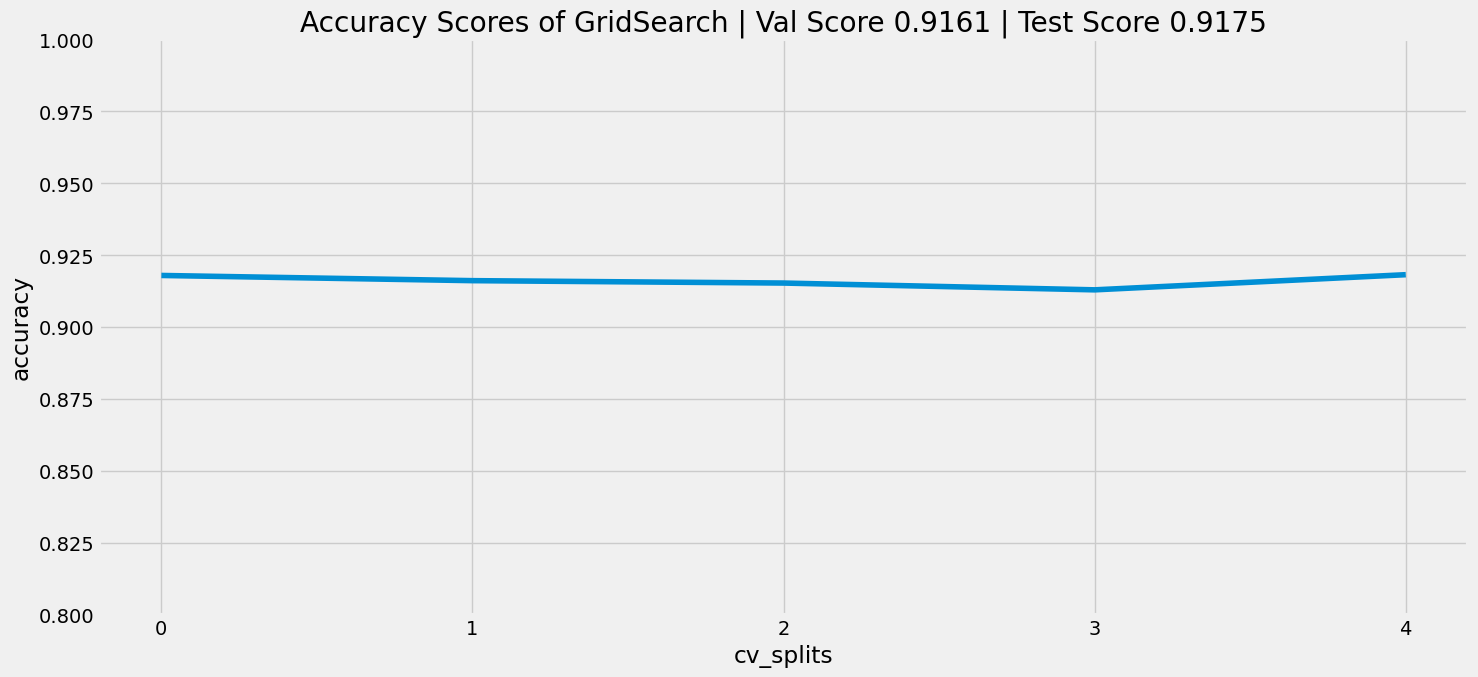

In [43]:
pd.DataFrame(grid_svc.cv_results_).sort_values(by = "rank_test_score").iloc[0, -8:-3].plot()
plt.xticks(range(5), labels=range(5))
plt.xlabel("cv_splits")
plt.ylabel("accuracy")
plt.ylim(0.8, 1)
plt.gcf().set_size_inches(15, 7)
plt.title(f"Accuracy Scores of GridSearch | Val Score {grid_svc.best_score_:.4f} | Test Score {grid_svc.score(x_test, y_test):.4f}")
plt.tight_layout()

### ROC Curve

Text(0, 0.5, 'True Positive Rate')

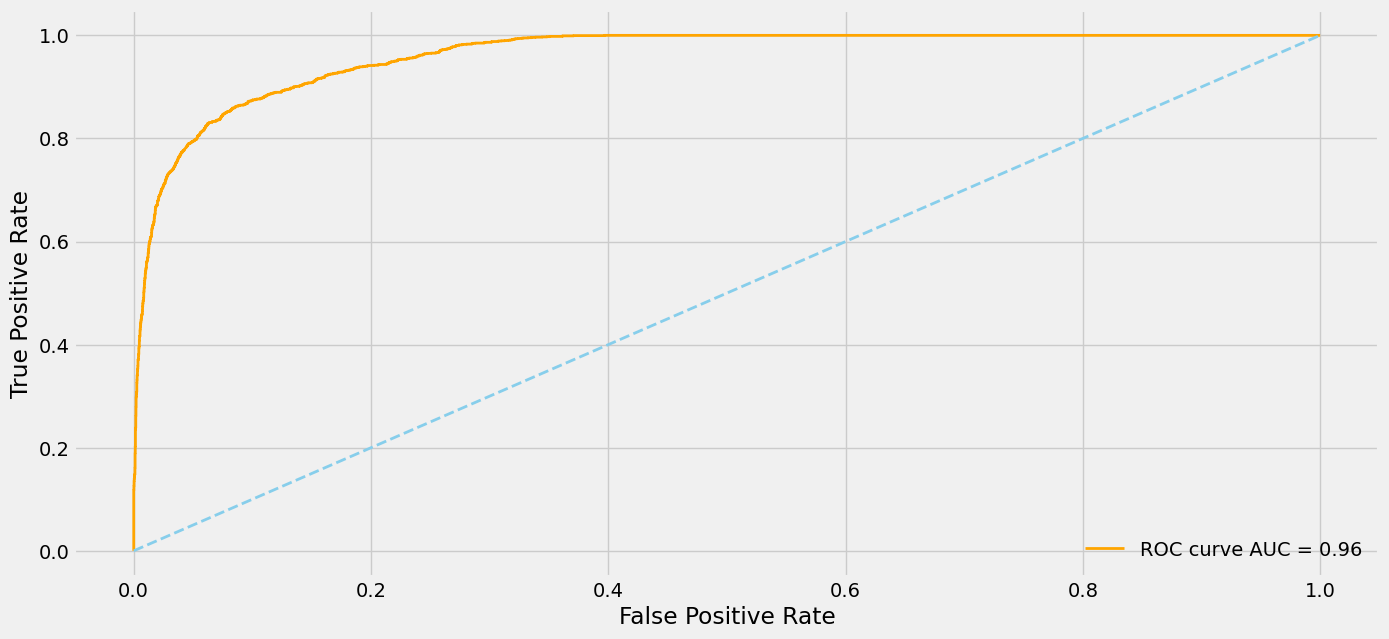

In [44]:
y_pred_svc = grid_svc.predict(x_test)
y_score_svc = grid_svc.predict_proba(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score_svc[:, 1])

roc_auc_svc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="orange", lw=2, label=f'ROC curve AUC = {roc_auc_svc:.2f}')
plt.plot([0, 1], [0, 1], color="skyblue", lw=2, linestyle="--")
plt.legend(loc="lower right", framealpha = 0)
plt.gcf().set_size_inches(15, 7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

### Classification Report

In [45]:
y_pred_scv = grid_svc.predict(x_test)
pd.DataFrame(classification_report(y_test, y_pred_scv, output_dict=True)).rename({"0": "rejected-0", "1":"approved-1"}, axis = 1).T

precision    recall  f1-score      support
rejected-0     0.938841  0.956279  0.947480  6999.000000
approved-1     0.836364  0.782000  0.808269  2000.000000
accuracy       0.917546  0.917546  0.917546     0.917546
macro avg      0.887602  0.869140  0.877874  8999.000000
weighted avg   0.916066  0.917546  0.916541  8999.000000

### Confusion Matrix

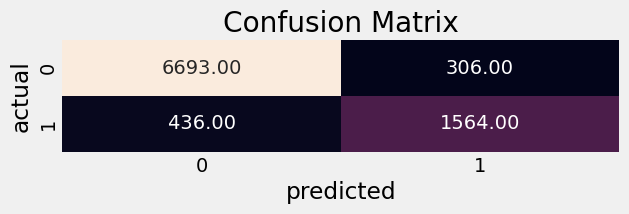

In [46]:
g = sns.heatmap(confusion_matrix(y_test, y_pred_scv), annot=True, fmt=".2f", cbar=False)
g.set_ylabel("actual")
g.set_xlabel("predicted")
g.set_title("Confusion Matrix")
g.set_aspect(0.2)

## Random Forest

In [47]:
params = [
    {
        "model": [RandomForestClassifier()],
        "model__n_estimators": [200, 400, 600, 1000],
        "model__max_depth": [10, 20, 30],
        "model__max_features": [3, 5, 8, 10],
        
    }
]

grid_rf = GridSearchCV(
    estimator=model_pipe,
    param_grid=params,
    scoring="accuracy",
    n_jobs= -1,
    verbose = 3,
    cv=5
    
)

grid_rf.fit(x_train, y_train)
grid_rf.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder_label',
                                                  Pipeline(steps=[('label '
                                                                   'encoder',
                                                                   OrdinalEncoder())]),
                                                  ['person_gender',
                                                   'previous_loan_defaults_on_file']),
                                                 ('encoder_ohe',
                                                  Pipeline(steps=[('one-hot '
                                                                   'encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['person_home_ownership',
                                                   'loan_intent'...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt',
                                                   'cb_person_cred_hist_length']),
                                                 ('std_scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_int_rate',
                                                   'credit_score'])])),
                ('model',
                 RandomForestClassifier(max_depth=20, max_features=10,
                                        n_estimators=200))])

### Best HyperParameters

In [48]:
best_p = dict(grid_rf.best_params_)
best_params = pd.DataFrame(best_p.items()).set_index(0);best_params.T.set_index("model")

0                        model__max_depth model__max_features  \
model                                                           
RandomForestClassifier()               20                  10   

0                        model__n_estimators  
model                                         
RandomForestClassifier()                 200

### Val and Test Scores

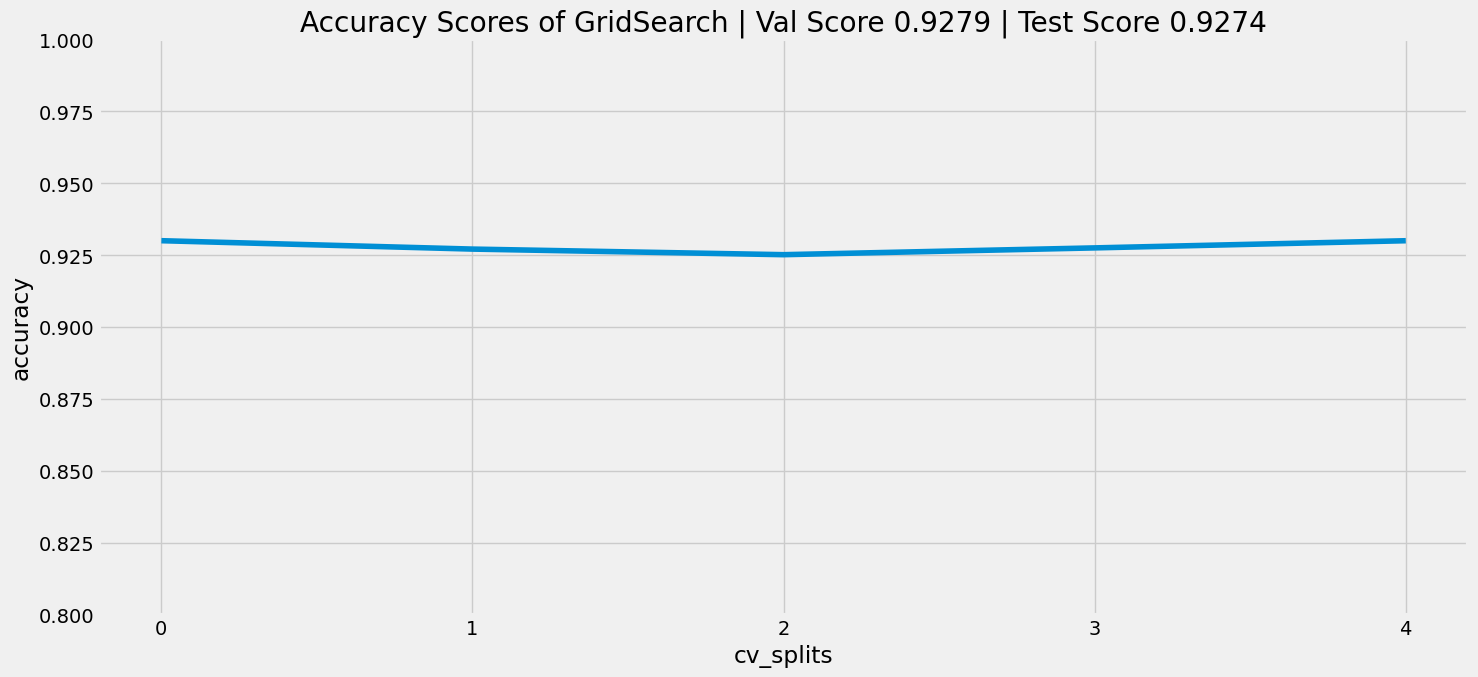

In [49]:
pd.DataFrame(grid_rf.cv_results_).sort_values(by = "rank_test_score").iloc[0, -8:-3].plot()
plt.xticks(range(5), labels=range(5))
plt.xlabel("cv_splits")
plt.ylabel("accuracy")
plt.ylim(0.8, 1)
plt.gcf().set_size_inches(15, 7)
plt.title(f"Accuracy Scores of GridSearch | Val Score {grid_rf.best_score_:.4f} | Test Score {grid_rf.score(x_test, y_test):.4f}")
plt.tight_layout()

### ROC Curve

Text(0, 0.5, 'True Positive Rate')

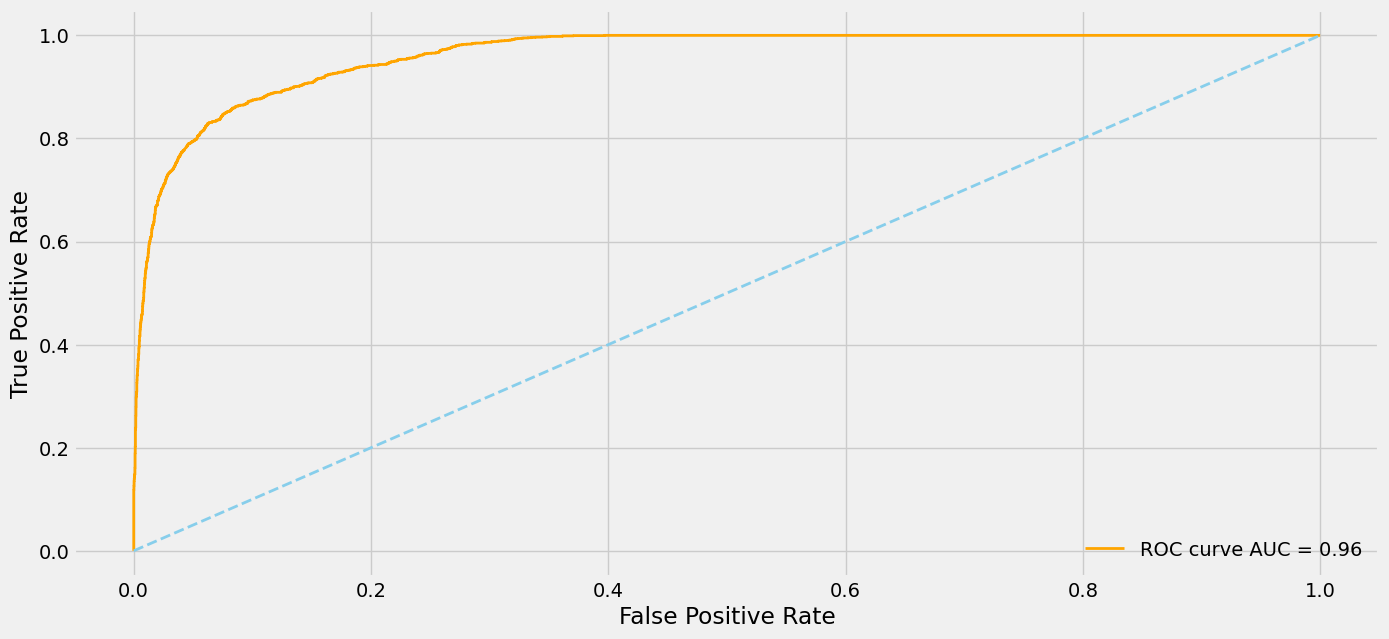

In [50]:
y_pred_rf = grid_rf.predict(x_test)
y_score_rf = grid_rf.predict_proba(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score_svc[:, 1])

roc_auc_rf = auc(fpr, tpr)

plt.plot(fpr, tpr, color="orange", lw=2, label=f'ROC curve AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color="skyblue", lw=2, linestyle="--")
plt.legend(loc="lower right", framealpha = 0)
plt.gcf().set_size_inches(15, 7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

### Classification Report

In [51]:
y_pred_rf = grid_rf.predict(x_test)
pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).rename({"0": "rejected-0", "1":"approved-1"}, axis = 1).T

precision    recall  f1-score      support
rejected-0     0.942662  0.965424  0.953907  6999.000000
approved-1     0.867832  0.794500  0.829548  2000.000000
accuracy       0.927436  0.927436  0.927436     0.927436
macro avg      0.905247  0.879962  0.891728  8999.000000
weighted avg   0.926031  0.927436  0.926269  8999.000000

### Confusion Matrix

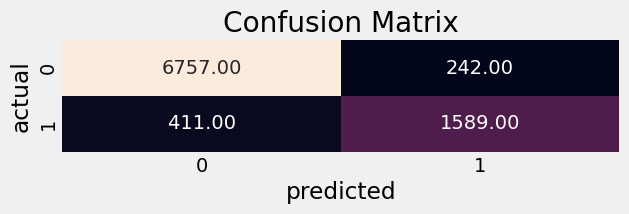

In [52]:
g = sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt=".2f", cbar=False)
g.set_ylabel("actual")
g.set_xlabel("predicted")
g.set_title("Confusion Matrix")
g.set_aspect(0.2)

## LightGBM

In [53]:
params = [
    {
      "model": [LGBMClassifier()],
      "model__num_leaves": [50, 100, 150, 200],
      "model__max_depth" : [10, 20, 30],
      "model__n_estimators" : [200, 400, 600, 800],
      "model__subsample": [0.6, 0.8, 0.90]  
    }
]


grid_lgmb = GridSearchCV(
    estimator=model_pipe,
    param_grid=params,
    scoring = "accuracy",
    n_jobs = -1,
    verbose = 3,
    cv = 5
)

grid_lgmb.fit(x_train, y_train)
grid_lgmb.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[LightGBM] [Info] Number of positive: 8000, number of negative: 27994
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1144
[LightGBM] [Info] Number of data points in the train set: 35994, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222259 -> initscore=-1.252549
[LightGBM] [Info] Start training from score -1.252549


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder_label',
                                                  Pipeline(steps=[('label '
                                                                   'encoder',
                                                                   OrdinalEncoder())]),
                                                  ['person_gender',
                                                   'previous_loan_defaults_on_file']),
                                                 ('encoder_ohe',
                                                  Pipeline(steps=[('one-hot '
                                                                   'encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['person_home_ownership',
                                                   'loan_intent'...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt',
                                                   'cb_person_cred_hist_length']),
                                                 ('std_scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_int_rate',
                                                   'credit_score'])])),
                ('model',
                 LGBMClassifier(max_depth=20, n_estimators=200, num_leaves=100,
                                subsample=0.6))])

### Best HyperParameters

In [54]:
best_params = pd.DataFrame(grid_lgmb.best_params_, index = [0]).set_index("model");best_params

model__max_depth  model__n_estimators  model__num_leaves  \
model                                                                        
LGBMClassifier()                20                  200                100   

                  model__subsample  
model                               
LGBMClassifier()               0.6

### Val and Test Scores

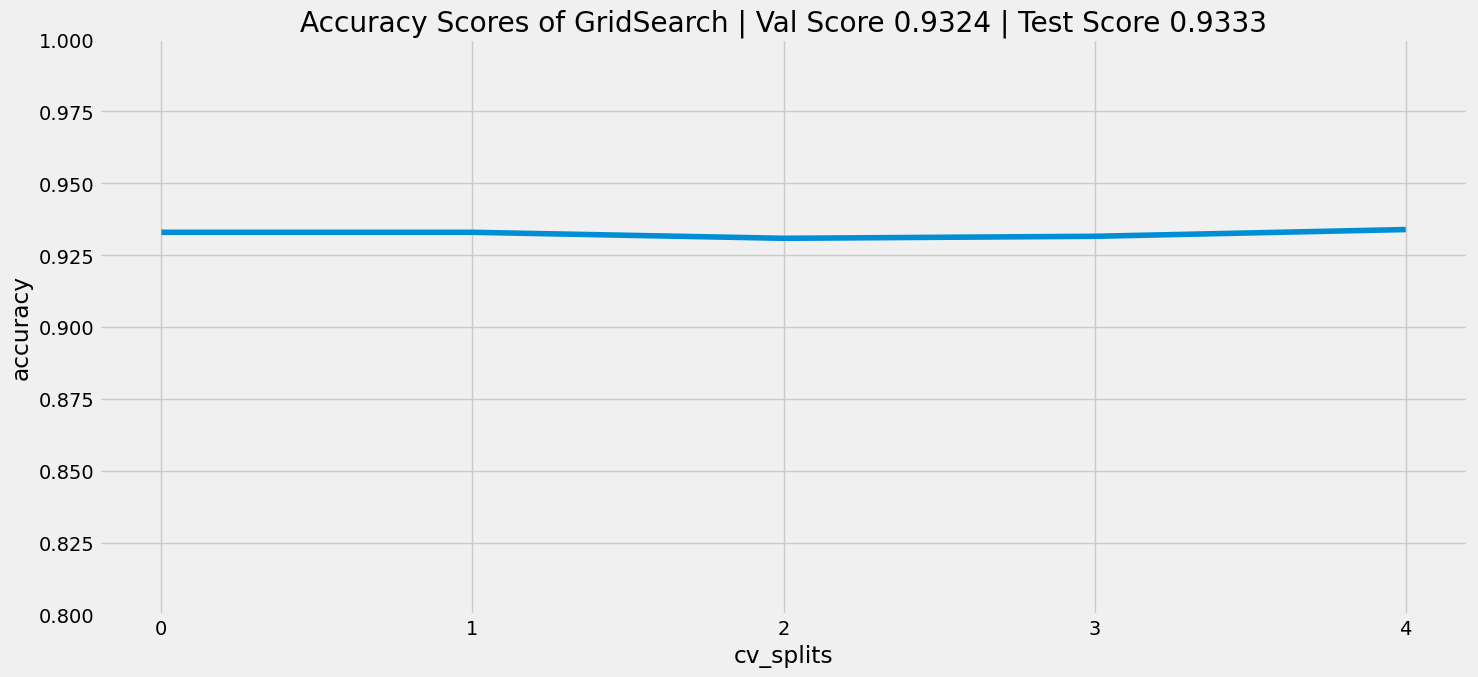

In [55]:
pd.DataFrame(grid_lgmb.cv_results_).sort_values(by = "rank_test_score").iloc[0, -8:-3].plot()
plt.xticks(range(5), labels=range(5))
plt.xlabel("cv_splits")
plt.ylabel("accuracy")
plt.ylim(0.8, 1)
plt.gcf().set_size_inches(15, 7)
plt.title(f"Accuracy Scores of GridSearch | Val Score {grid_lgmb.best_score_:.4f} | Test Score {grid_lgmb.score(x_test, y_test):.4f}")
plt.tight_layout()

### ROC Curve

Text(0, 0.5, 'True Positive Rate')

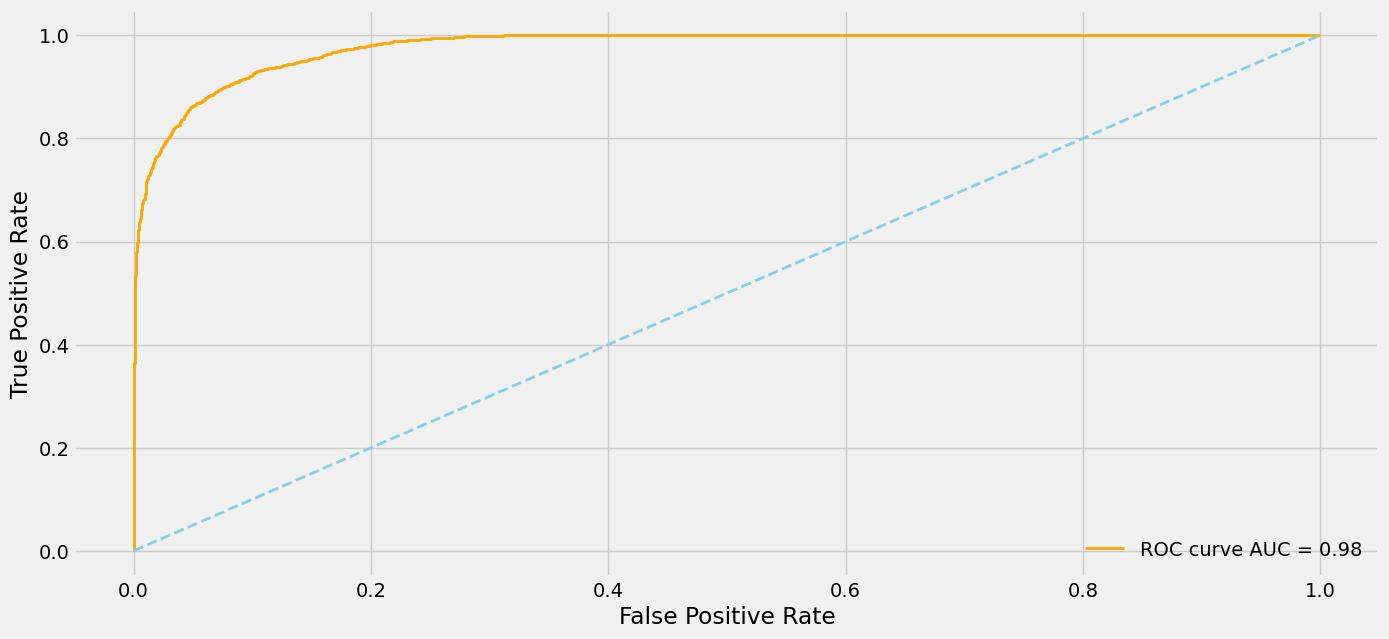

In [56]:
y_pred_lgbm = grid_lgmb.predict(x_test)
y_score_lgbm = grid_lgmb.predict_proba(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score_lgbm[:, 1])

roc_auc_lgbm = auc(fpr, tpr)

plt.plot(fpr, tpr, color="orange", lw=2, label=f'ROC curve AUC = {roc_auc_lgbm:.2f}')
plt.plot([0, 1], [0, 1], color="skyblue", lw=2, linestyle="--")
plt.legend(loc="lower right", framealpha = 0)
plt.gcf().set_size_inches(15, 7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

### Classification Report

In [57]:
y_pred_lgbm = grid_lgmb.predict(x_test)
pd.DataFrame(classification_report(y_test, y_pred_lgbm, output_dict=True)).rename({"0": "rejected-0", "1":"approved-1"}, axis = 1).T

precision    recall  f1-score      support
rejected-0     0.949684  0.965424  0.957489  6999.000000
approved-1     0.871550  0.821000  0.845520  2000.000000
accuracy       0.933326  0.933326  0.933326     0.933326
macro avg      0.910617  0.893212  0.901505  8999.000000
weighted avg   0.932319  0.933326  0.932604  8999.000000

### Confusion Matrix

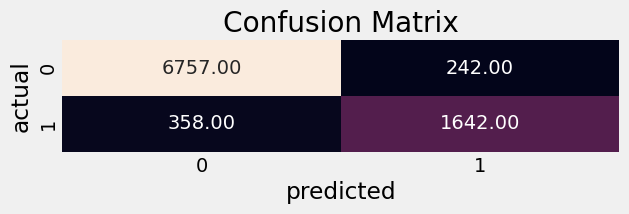

In [58]:
g = sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt=".2f", cbar=False)
g.set_ylabel("actual")
g.set_xlabel("predicted")
g.set_title("Confusion Matrix")
g.set_aspect(0.2)

## Multi-Layer Neural Network

In [59]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [60]:
with tf.device("/CPU:0"):

    model = keras.Sequential()
    model.add(keras.Input(shape = (x_train_final.shape[1],)))
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(32, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))

    early_ = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
    model.compile(
        optimizer="adam",
        loss = ["binary_crossentropy"],
        metrics = ["accuracy"]
    )
    
    history = model.fit(x_train_final, y_train, epochs=100, validation_split=0.10, callbacks=[early_])

Epoch 1/100
1013/1013 [==============================] - 2s 2ms/step - loss: 0.2237 - accuracy: 0.8989 - val_loss: 0.1891 - val_accuracy: 0.9142
Epoch 2/100
1013/1013 [==============================] - 1s 1ms/step - loss: 0.1924 - accuracy: 0.9131 - val_loss: 0.1953 - val_accuracy: 0.9058
Epoch 3/100
1013/1013 [==============================] - 1s 1ms/step - loss: 0.1839 - accuracy: 0.9185 - val_loss: 0.1799 - val_accuracy: 0.9161
Epoch 4/100
1013/1013 [==============================] - 1s 1ms/step - loss: 0.1799 - accuracy: 0.9189 - val_loss: 0.1775 - val_accuracy: 0.9206
Epoch 5/100
1013/1013 [==============================] - 1s 1ms/step - loss: 0.1761 - accuracy: 0.9208 - val_loss: 0.1799 - val_accuracy: 0.9136
Epoch 6/100
1013/1013 [==============================] - 1s 1ms/step - loss: 0.1729 - accuracy: 0.9231 - val_loss: 0.1808 - val_accuracy: 0.9172
Epoch 7/100
1013/1013 [==============================] - 1s 1ms/step - loss: 0.1718 - accuracy: 0.9243 - val_loss: 0.1765 - val_ac

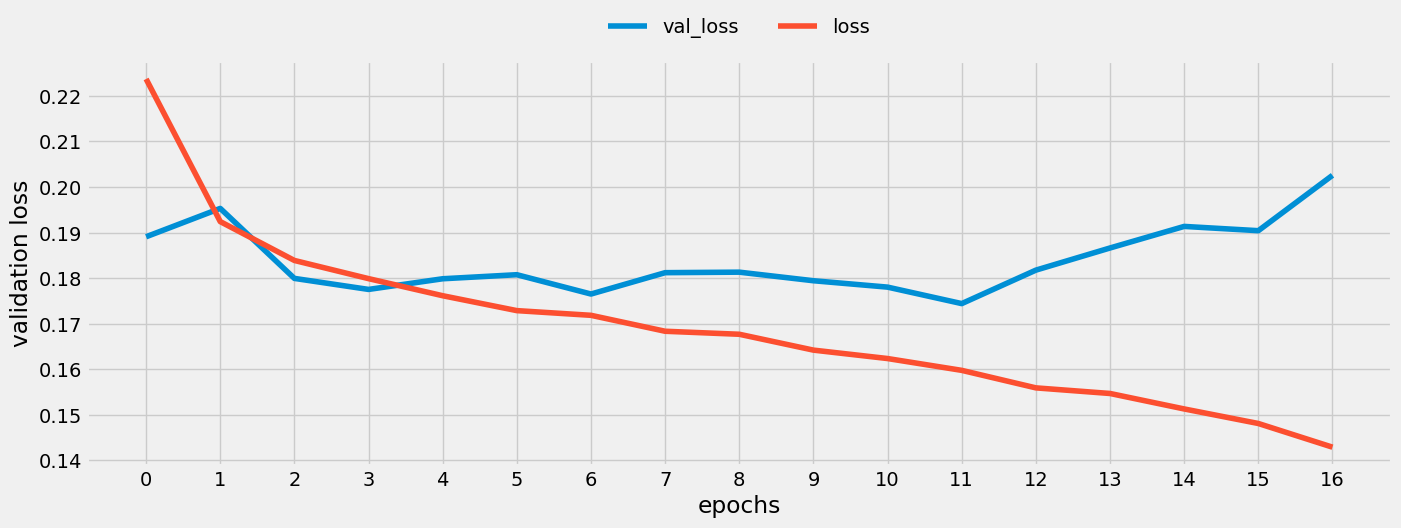

In [61]:
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["loss"], label = "loss")
plt.xticks(history.epoch)
plt.xlabel("epochs")
plt.ylabel("validation loss")
plt.legend(loc = "upper center", bbox_to_anchor = (0.50, 1.15), ncols = 2, framealpha = 0)
plt.gcf().set_size_inches(15,5)

### Val and Test Scores

282/282 [==============================] - 3s 4ms/step - loss: 0.1874 - accuracy: 0.9177


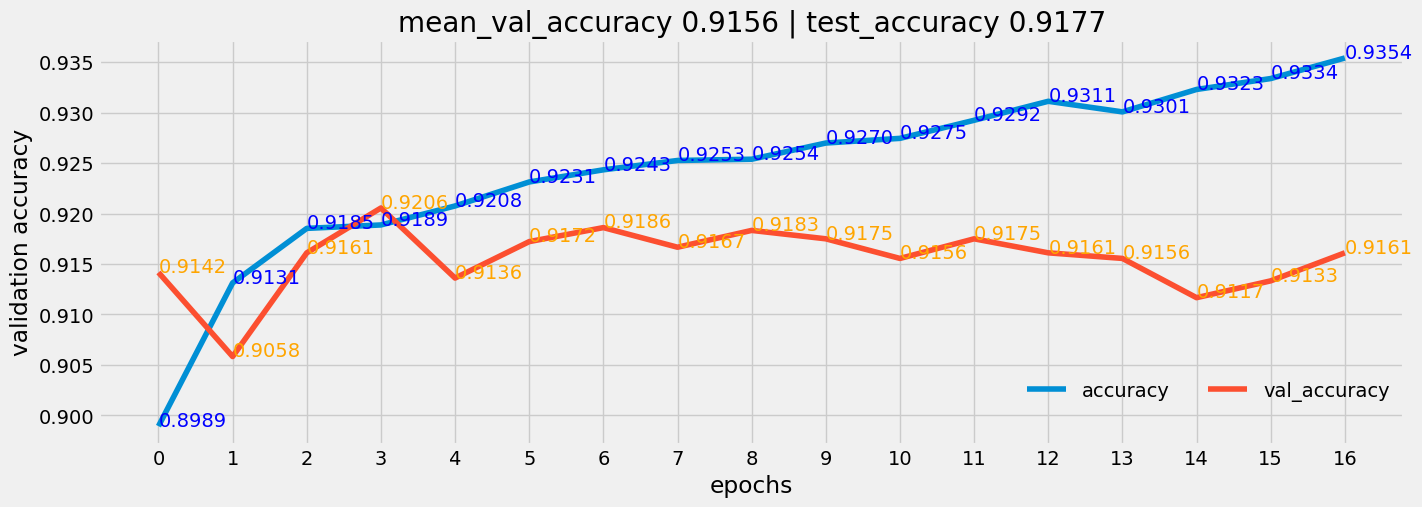

In [62]:
plt.style.use("fivethirtyeight")
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.xticks(history.epoch);
plt.xlabel("epochs")
plt.ylabel("validation accuracy")
plt.legend(loc = "upper center", bbox_to_anchor = (0.85, 0.20), ncols = 2, framealpha = 0)
plt.gcf().set_size_inches(15,5)
plt.title(f"mean_val_accuracy {np.mean(history.history['val_accuracy']):.4f} | test_accuracy {model.evaluate(x_test_final, y_test)[1]:.4f}")
val_acc = pd.Series(history.history["val_accuracy"], index = history.epoch)
acc = pd.Series(history.history["accuracy"], index = history.epoch)

for index, value in val_acc.items():
    plt.text(x = index, y = value, s = f"{value:.4f}", fontdict = dict(color = "orange"))


for index, value in acc.items():
    plt.text(x = index, y = value, s = f"{value:.4f}", fontdict = dict(color = "blue"))
    
    

### ROC Curve

282/282 [==============================] - 1s 2ms/step


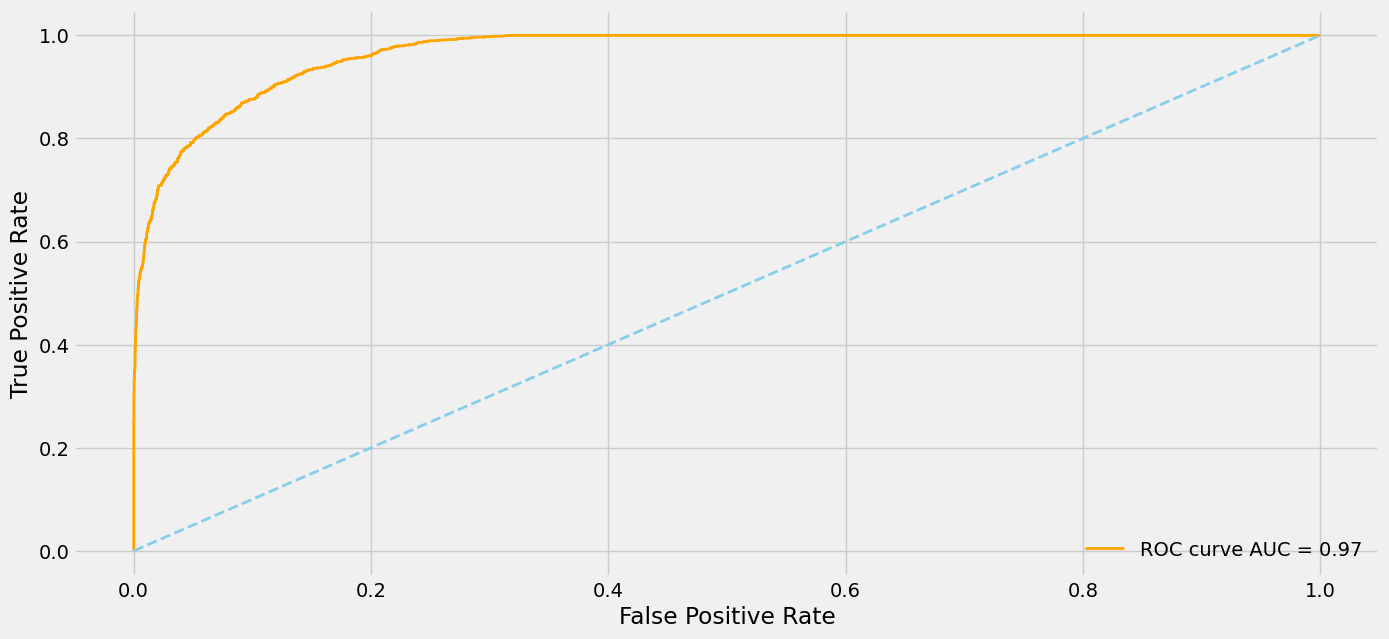

In [63]:
y_score_nn = model.predict(x_test_final)

fpr, tpr, _ = roc_curve(y_test, y_score_nn)

roc_auc_nn = auc(fpr, tpr)

plt.plot(fpr, tpr, color="orange", lw=2, label=f'ROC curve AUC = {roc_auc_nn:.2f}')
plt.plot([0, 1], [0, 1], color="skyblue", lw=2, linestyle="--")
plt.legend(loc="lower right", framealpha = 0)
plt.gcf().set_size_inches(15, 7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate");

### Classification Report

In [64]:
y_pred_nn = model.predict(x_test_final)
y_pred_label_nn = np.where(y_pred_nn > 0.50, 1, 0)
pd.DataFrame(classification_report(y_test, y_pred_label_nn, output_dict=True)).rename({"0": "rejected-0", "1":"approved-1"}, axis = 1).T

282/282 [==============================] - 1s 3ms/step


precision    recall  f1-score      support
rejected-0     0.933860  0.962280  0.947857  6999.000000
approved-1     0.852266  0.761500  0.804331  2000.000000
accuracy       0.917658  0.917658  0.917658     0.917658
macro avg      0.893063  0.861890  0.876094  8999.000000
weighted avg   0.915726  0.917658  0.915959  8999.000000

### Confusion Matrix

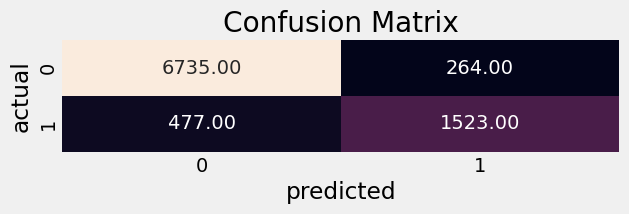

In [65]:
g = sns.heatmap(confusion_matrix(y_test, y_pred_label_nn), annot=True, fmt=".2f", cbar=False)
g.set_ylabel("actual")
g.set_xlabel("predicted")
g.set_title("Confusion Matrix")
g.set_aspect(0.2)

<h1> Model Comparison and Final Reviews</h1>

### Best 3 Models by Accuracy Score

In [66]:
model_list = ["Logistic Regression", "K-Nearest Neighbors", "Support Vector Classifier", "Random Forest Classifier", "LightGBM", "Multi-Layer Neural Network"]
preds = [y_pred_log, y_pred_knn, y_pred_scv, y_pred_rf, y_pred_lgbm, y_pred_label_nn]
acc_scores = []

for name, score in zip(model_list, preds):
    acc_scores.append((name, classification_report(y_test, score, output_dict=True)["accuracy"]))

best_models_acc = pd.DataFrame(data = acc_scores, columns = ["Model Name", "Accuracy Scores"])\
.sort_values(by = "Accuracy Scores", ascending=False, ignore_index=True).iloc[:3, :];best_models_acc

Model Name  Accuracy Scores
0                    LightGBM         0.933326
1    Random Forest Classifier         0.927436
2  Multi-Layer Neural Network         0.917658

### Best 3 Models by Auc Score

In [67]:
auc_scores_list = [roc_auc_log, roc_auc_knn, roc_auc_svc, roc_auc_rf, roc_auc_lgbm, roc_auc_nn]
auc_scores = []
for name, score in zip(model_list, auc_scores_list):
    auc_scores.append((name, score))

best_models_auc = pd.DataFrame(data = auc_scores, columns = ["Model Name", "Auc Scores"])\
.sort_values(by = "Auc Scores", ascending=False, ignore_index=True).iloc[:3, :];best_models_auc

Model Name  Auc Scores
0                    LightGBM    0.977471
1  Multi-Layer Neural Network    0.967389
2   Support Vector Classifier    0.961610

> Accuracy ve auc göre yapılan karşılaştırmalara göre en iyi performans gösteren model LightGBM olmuştur. Aynı zamanda pozitif sınıfı tahmin etme performası açısından diğer modellerden de öndedir. rejected-0 için %95 approved-1 %84 lük bir f1-score yakalanmıştır.

<h1>Best Model-LightGBM</h1>

In [68]:
params_LGBM = {
               'max_depth': 20, 
               'n_estimators': 200, 
               'num_leaves': 100, 
               'subsample': 0.6
               }


best_model = LGBMClassifier(**params_LGBM)
best_model.fit(x_train_final, y_train)
best_model_pred = best_model.predict(x_test_final)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8000, number of negative: 27994
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1144
[LightGBM] [Info] Number of data points in the train set: 35994, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222259 -> initscore=-1.252549
[LightGBM] [Info] Start training from score -1.252549


### Best Model Classification Report

In [69]:
pd.DataFrame(classification_report(y_test, best_model_pred, output_dict=True)).rename({"0": "rejected-0", "1":"approved-1"}, axis = 1).T

precision    recall  f1-score      support
rejected-0     0.949684  0.965424  0.957489  6999.000000
approved-1     0.871550  0.821000  0.845520  2000.000000
accuracy       0.933326  0.933326  0.933326     0.933326
macro avg      0.910617  0.893212  0.901505  8999.000000
weighted avg   0.932319  0.933326  0.932604  8999.000000

### Best Model Confusion Matrix

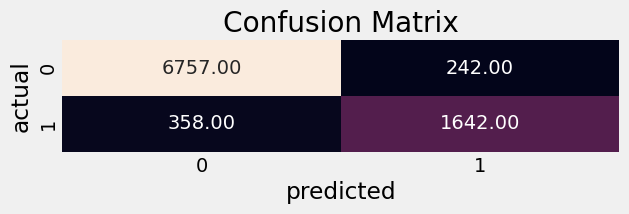

In [70]:
g = sns.heatmap(confusion_matrix(y_test, best_model_pred), annot=True, fmt=".2f", cbar=False)
g.set_ylabel("actual")
g.set_xlabel("predicted")
g.set_title("Confusion Matrix")
g.set_aspect(0.2)